## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1074]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats

In [1075]:
df1=pd.read_csv('data/kc_house_data.csv') 
df1

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
0          5650     1.0         NaN   0.0  ...      7        1180   
1          7242     2.0         0.0   0.0  ...      7        2170   
2         10000     1.0         0.0   0.0  ...      6         770   
3          5000     1.0         0.0   0.0  ...      7        1050   
4          8080     1.0         0.0   0.0  ...      8        1680   
...         ...     ...         ...   ...  ...    ...         ...   
21592      1131     3.0         0.0   0.0  ...      8        1530   
21593      5813     2.0         0.0   0.0  ...      8        2310   
21594      1350     2.0         0.0   0.0  ...      7        1020   
21595      2388     2.0         NaN   0.0  ...      8        1600   
21596      1076     2.0         0.0   0.0  ...      7        1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0                0.0     1955           0.0    98178  47.5112 -122.257   
1              400.0     1951        1991.0    98125  47.7210 -122.319   
2                0.0     1933           NaN    98028  47.7379 -122.233   
3              910.0     1965           0.0    98136  47.5208 -122.393   
4                0.0     1987           0.0    98074  47.6168 -122.045   
...              ...      ...           ...      ...      ...      ...   
21592            0.0     2009           0.0    98103  47.6993 -122.346   
21593            0.0     2014           0.0    98146  47.5107 -122.362   
21594            0.0     2009           0.0    98144  47.5944 -122.299   
21595            0.0     2004           0.0    98027  47.5345 -122.069   
21596            0.0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[21597 rows x 21 columns]

In [994]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [1076]:
df1['sqft_basement']=df1['sqft_basement'].str.extract(pat='(\d+)', expand=False)
df1['sqft_basement']=df1['sqft_basement'].astype(float)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21143 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [1077]:
price_mean=df1['price'].mean() 
price_std=df1['price'].std() 
sqft_living_mean=df1['sqft_living'].mean() 
sqft_living_std=df1['sqft_living'].std() 
sqft_lot_mean=df1['sqft_lot'].mean() 
sqft_lot_std=df1['sqft_lot'].std()
sqft_above_mean=df1['sqft_above'].mean() 
sqft_above_std=df1['sqft_above'].std()
sqft_basement_mean=df1['sqft_basement'].mean() 
sqft_basement_std=df1['sqft_basement'].std()
sqft_lot15_mean=df1['sqft_lot15'].mean() 
sqft_lot15_std=df1['sqft_lot15'].std()

In [1078]:
sd_criteria=2
df1=df1.drop(df1[abs(df1['price'])> price_mean + (sd_criteria*price_std)].index)
df1=df1.drop(df1[abs(df1['sqft_living'])> sqft_living_mean + (sd_criteria*sqft_living_std)].index)
df1=df1.drop(df1[abs(df1['sqft_lot'])> sqft_lot_mean + (sd_criteria*sqft_lot_std)].index)
df1=df1.drop(df1[abs(df1['sqft_above'])> sqft_above_mean + (sd_criteria*sqft_above_std)].index)
df1=df1.drop(df1[abs(df1['sqft_basement'])> sqft_basement_mean + (sd_criteria*sqft_basement_std)].index)
df1=df1.drop(df1[abs(df1['sqft_lot15'])> sqft_lot15_mean + (sd_criteria*sqft_lot15_std)].index)
df1= df1.drop(df1[df1['bedrooms'] > 11].index)
df1= df1.drop(df1[df1['bathrooms'] > 6].index)
df1.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  1.875700e+04  1.875700e+04  18757.000000  18757.000000  18757.000000   
mean   4.672442e+09  4.647717e+05      3.271739      1.999094   1865.080503   
std    2.875862e+09  2.077706e+05      0.849709      0.677657    654.331274   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.212200e+09  3.071500e+05      3.000000      1.500000   1370.000000   
50%    4.023500e+09  4.250000e+05      3.000000      2.000000   1790.000000   
75%    7.436300e+09  5.800000e+05      4.000000      2.500000   2300.000000   
max    9.900000e+09  1.270000e+06     11.000000      5.250000   3910.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  18757.000000  18757.000000  16675.000000  18705.000000  18757.000000   
mean    9225.498054      1.476862      0.002939      0.151991      3.407101   
std     9372.248641      0.540479      0.054130      0.603618      0.648068   
min      520.000000      1.000000      0.000000      0.000000      1.000000   
25%     4920.000000      1.000000      0.000000      0.000000      3.000000   
50%     7260.000000      1.000000      0.000000      0.000000      3.000000   
75%     9748.000000      2.000000      0.000000      0.000000      4.000000   
max    97661.000000      3.500000      1.000000      4.000000      5.000000   

             grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  18757.00000  18757.000000   18353.000000  18757.000000  15398.000000   
mean       7.45663   1638.064189     226.421348   1969.917524     74.123717   
std        0.97440    639.478047     341.660812     29.608496    377.398366   
min        3.00000    370.000000       0.000000   1900.000000      0.000000   
25%        7.00000   1150.000000       0.000000   1950.000000      0.000000   
50%        7.00000   1480.000000       0.000000   1972.000000      0.000000   
75%        8.00000   2030.000000     460.000000   1995.000000      0.000000   
max       11.00000   3440.000000    1170.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15    sqft_lot15  
count  18757.000000  18757.000000  18757.000000   18757.000000  18757.000000  
mean   98080.300848     47.558360   -122.221999    1861.911660   8612.219278  
std       53.542661      0.140369      0.137797     560.874784   7497.029614  
min    98001.000000     47.155900   -122.512000     460.000000    651.000000  
25%    98033.000000     47.464600   -122.334000    1445.000000   5000.000000  
50%    98072.000000     47.568700   -122.256000    1760.000000   7350.000000  
75%    98118.000000     47.680200   -122.139000    2200.000000   9477.000000  
max    98199.000000     47.777600   -121.315000    4610.000000  67268.000000

By looking at the 5 point data, we can understand that variables like 'bedrooms', 'bathrooms', 'floor', 'waterfront', 'view', 'condition' and 'grade' are categorical variables and may need to implement dummy variables to handle these.

In [1079]:
df2=df1.iloc[:,2:21]
df2
df2=df2.drop(['zipcode','lat','long'],axis=1)

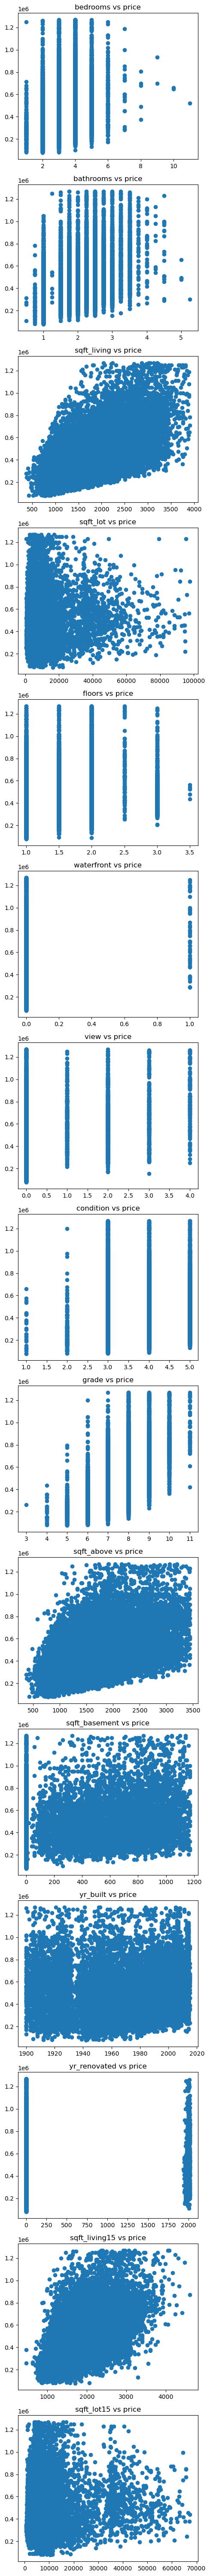

In [1080]:
fig, axes = plt.subplots(nrows=len(df2.columns)-1, ncols=1, figsize=(5, 60))

# Plot scatter plots for each column against 'Y'
for i, column in enumerate(df2.columns[1:20]):
    axes[i].scatter(y=df2['price'], x=df2[column])
    axes[i].set_title(f'{column} vs price')
    

plt.tight_layout()
plt.show()

In [1081]:
df2=df2.drop(df2[(df2['sqft_basement']==0)].index)

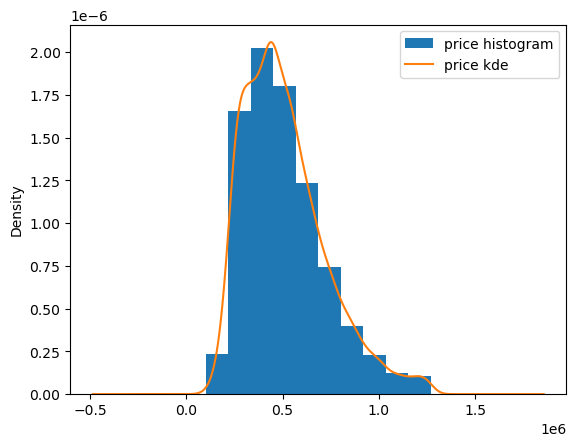

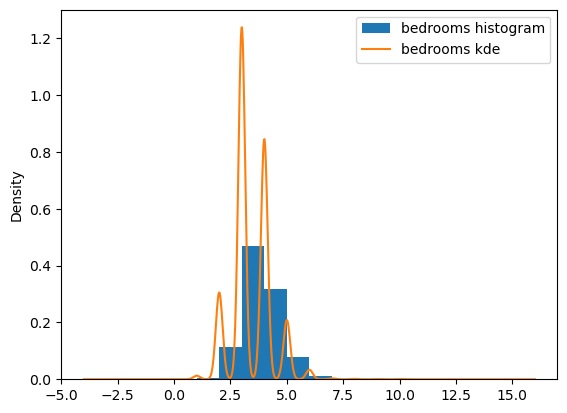

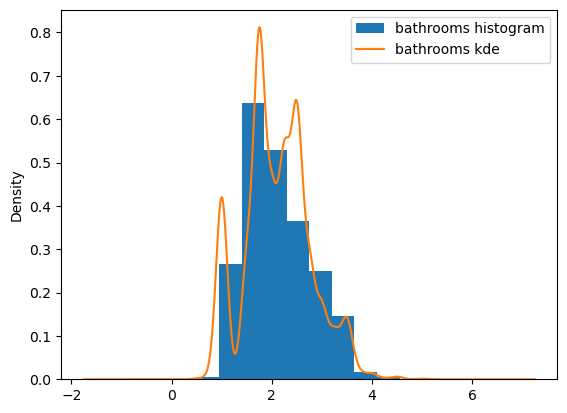

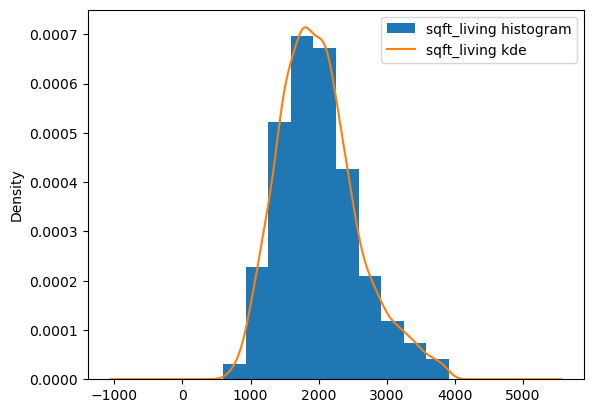

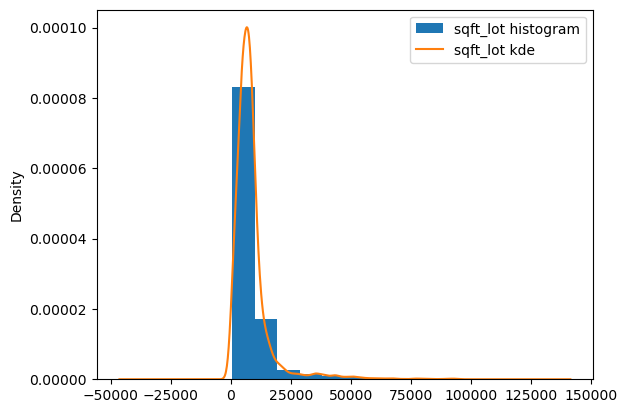

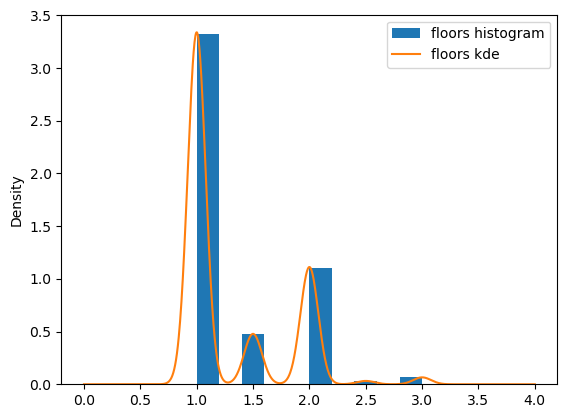

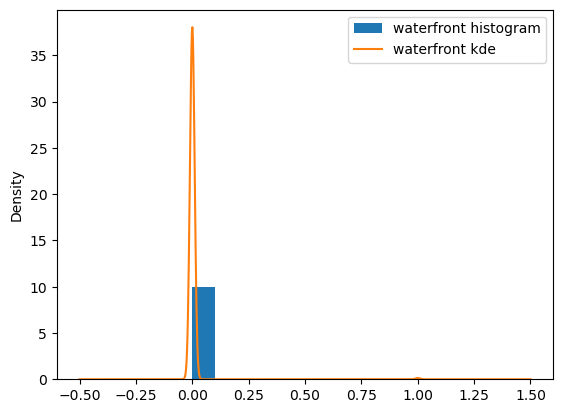

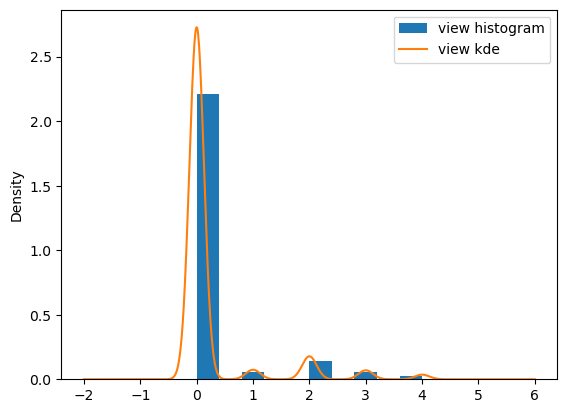

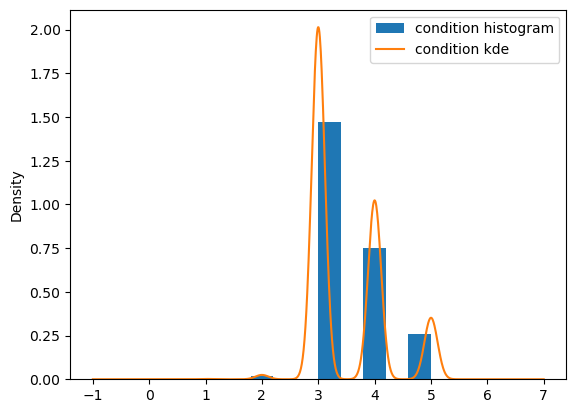

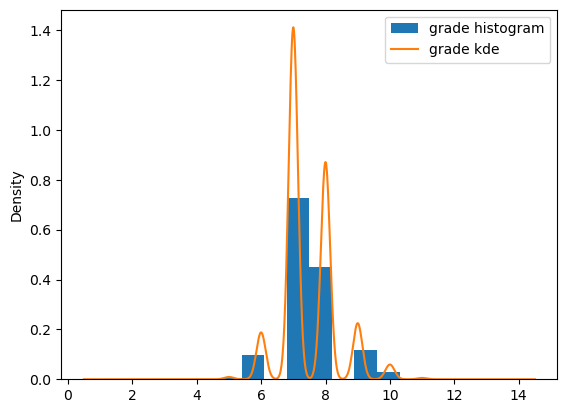

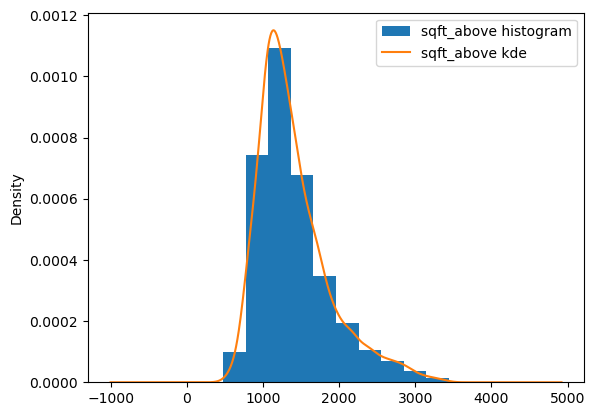

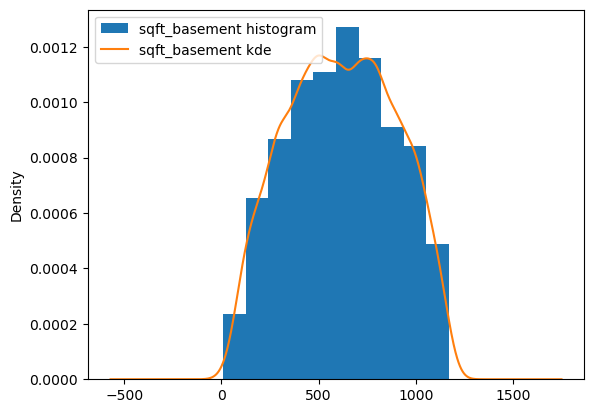

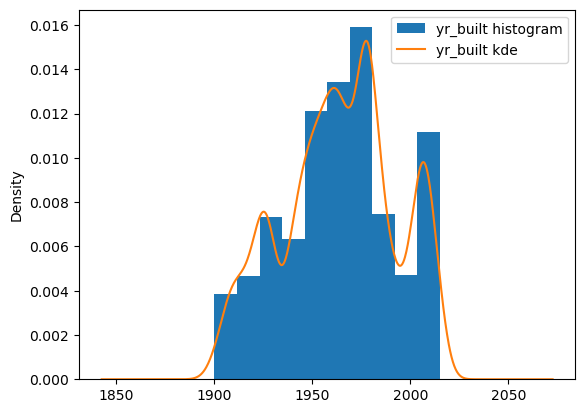

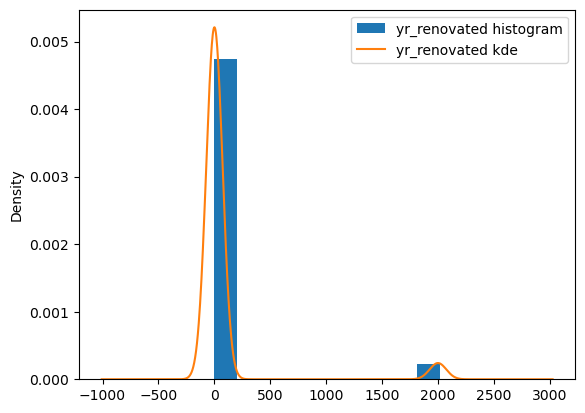

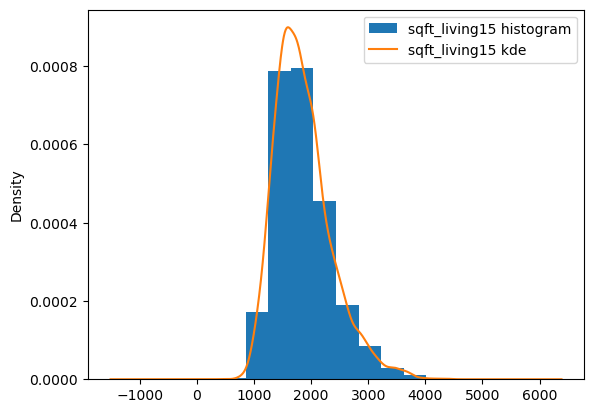

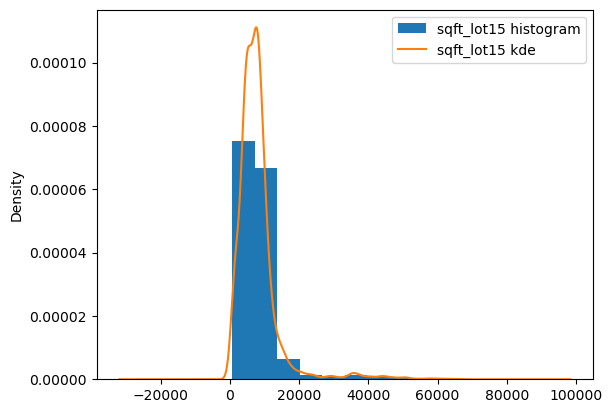

In [1082]:
for column in df2:
    df2[column].plot.hist(density=True, label = column+' histogram')
    df2[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     449.0
Date:                Sat, 02 Dec 2023   Prob (F-statistic):               0.00
Time:                        08:59:39   Log-Likelihood:                -64908.
No. Observations:                4889   AIC:                         1.298e+05
Df Residuals:                    4874   BIC:                         1.299e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.654e+06   1.85e+05     25.159

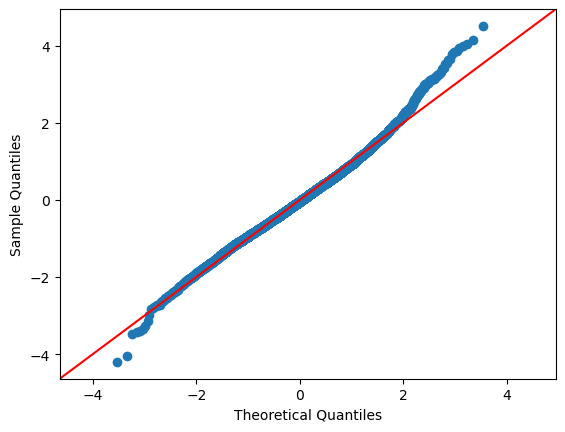

In [1083]:
outcome='price'
x_cols=df2.iloc[:,1:20]
predictors='+'.join(x_cols)
formula=outcome+'~'+predictors
model_itr1=smf.ols(formula=formula,data=df2).fit()
print(model_itr1.summary())

residuals = model_itr1.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

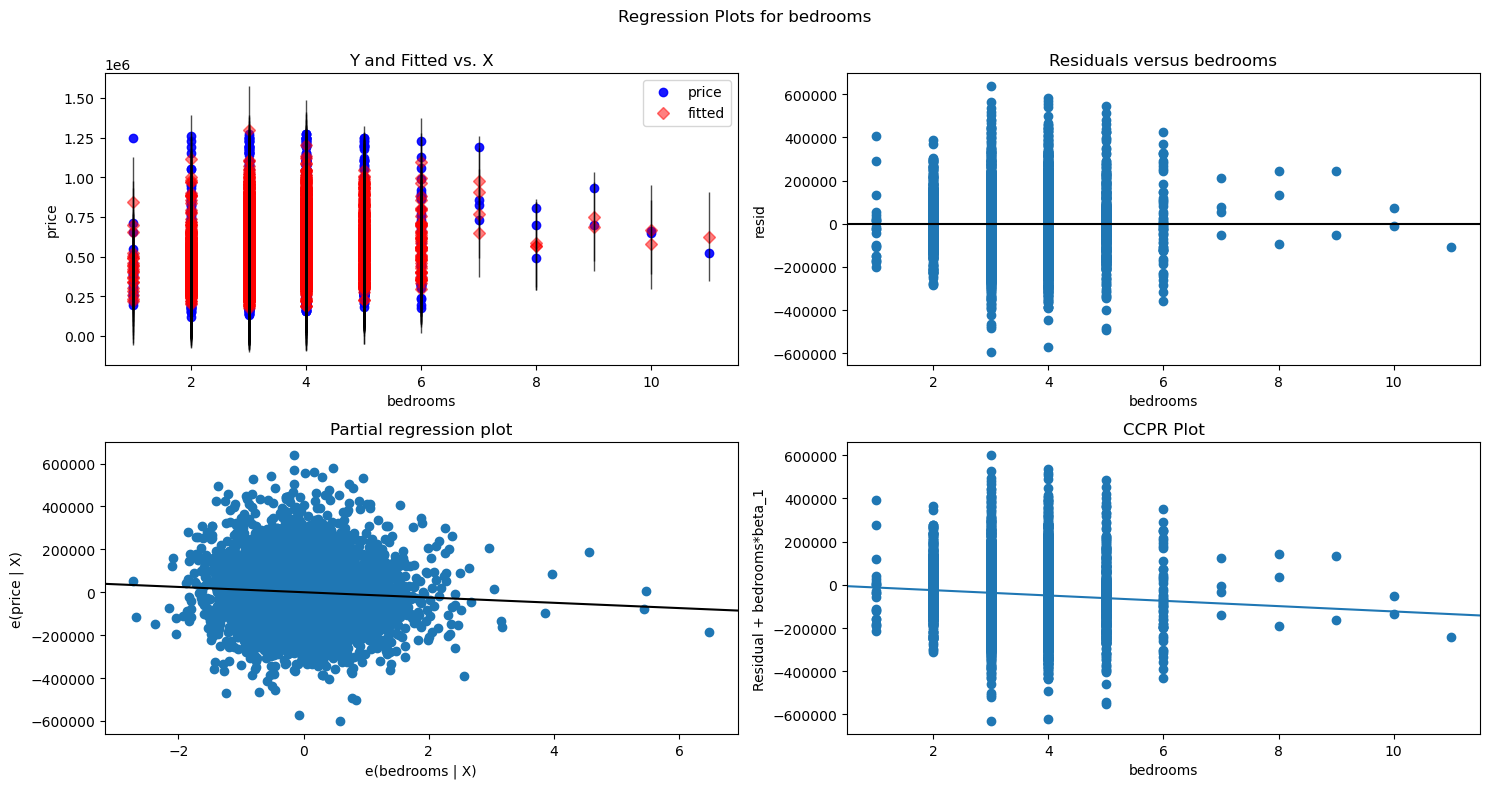

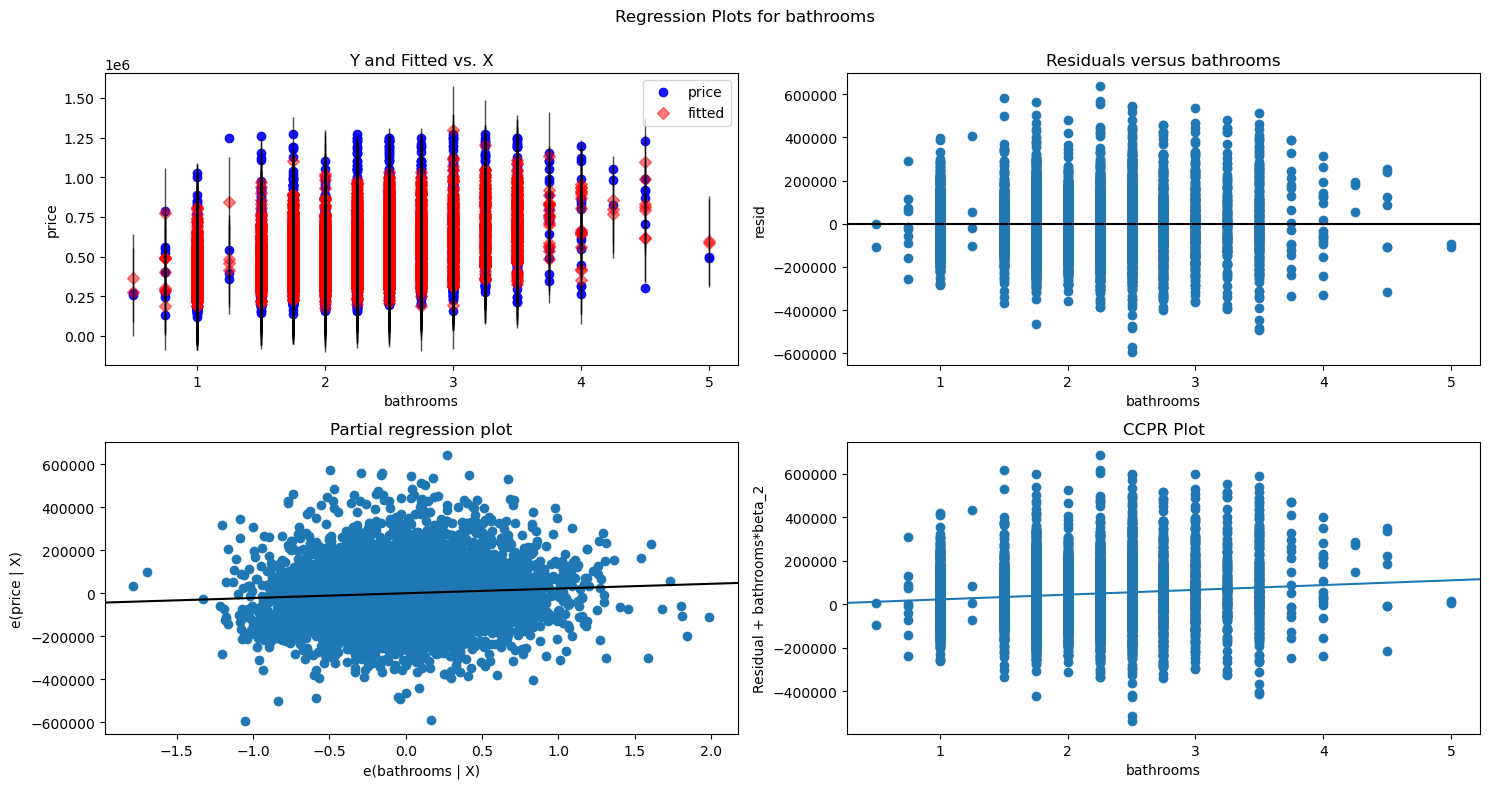

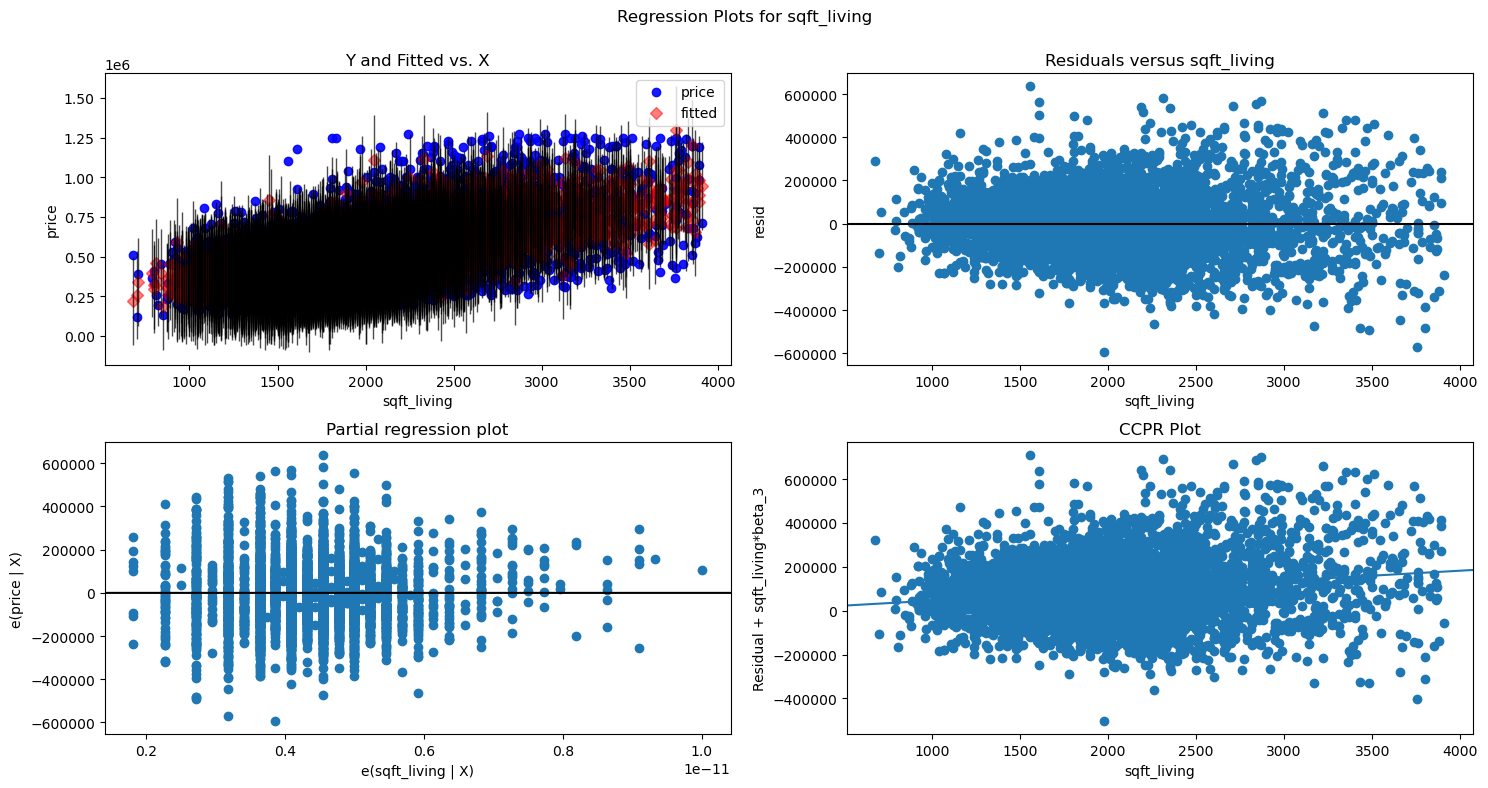

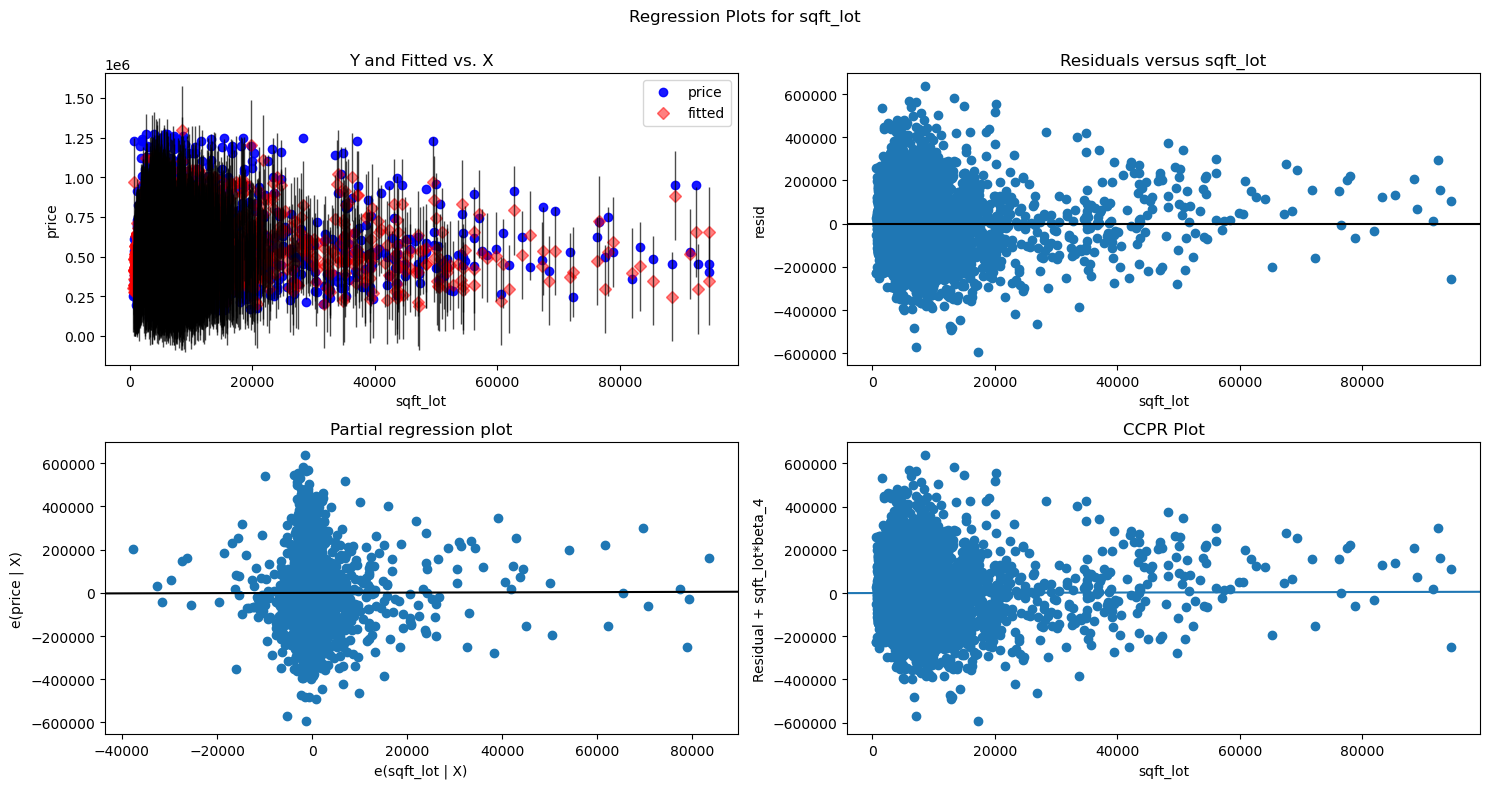

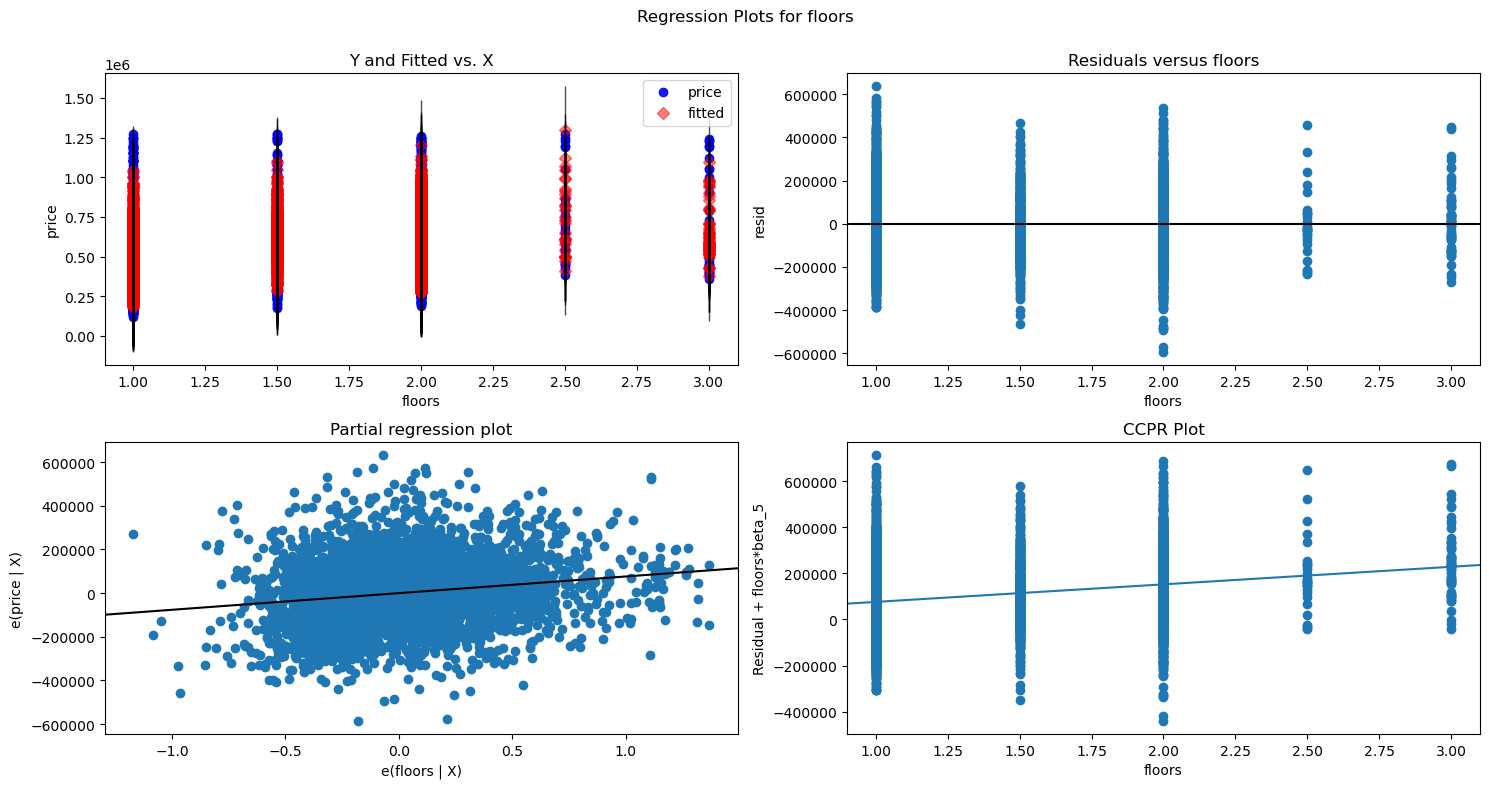

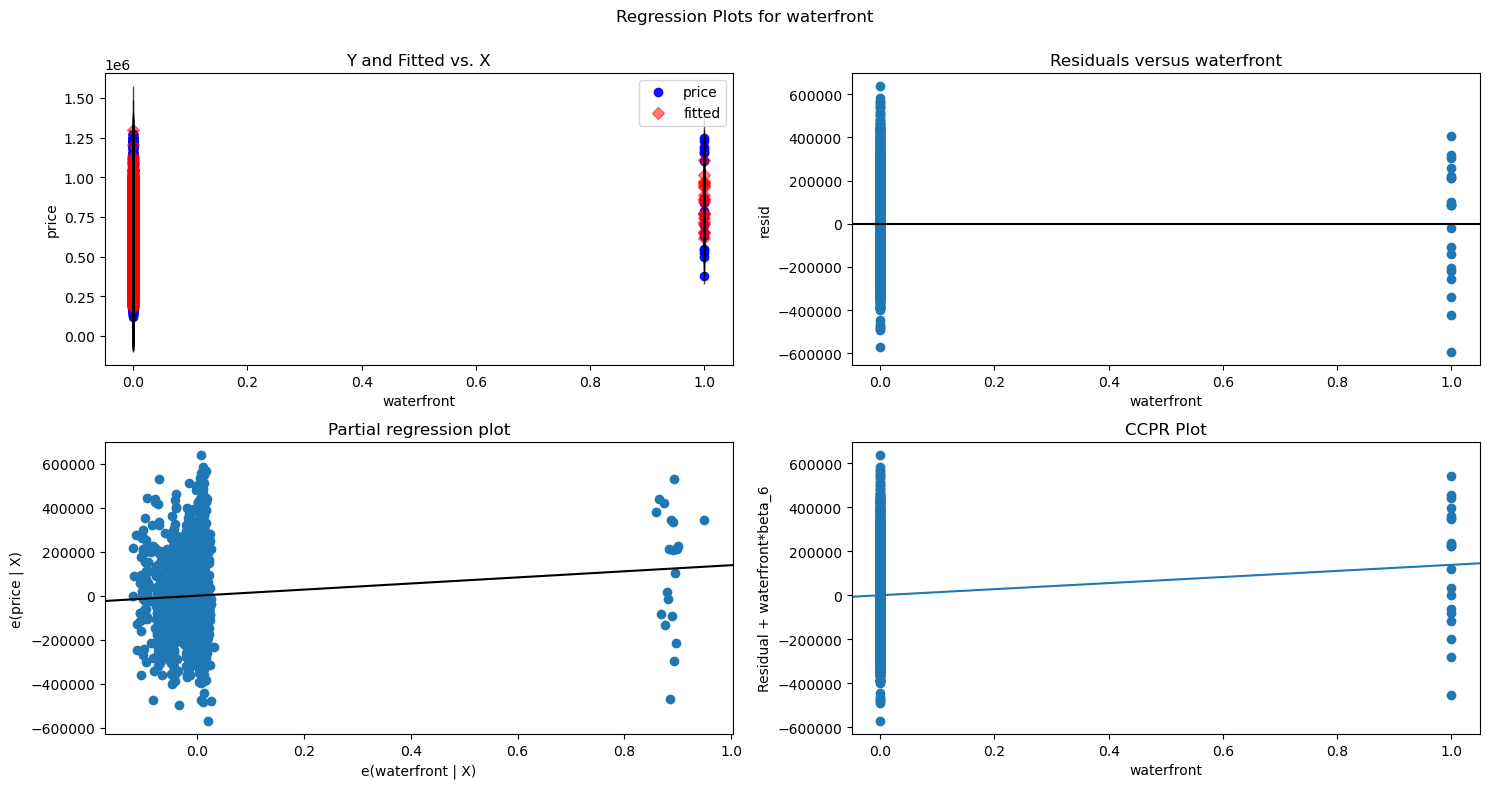

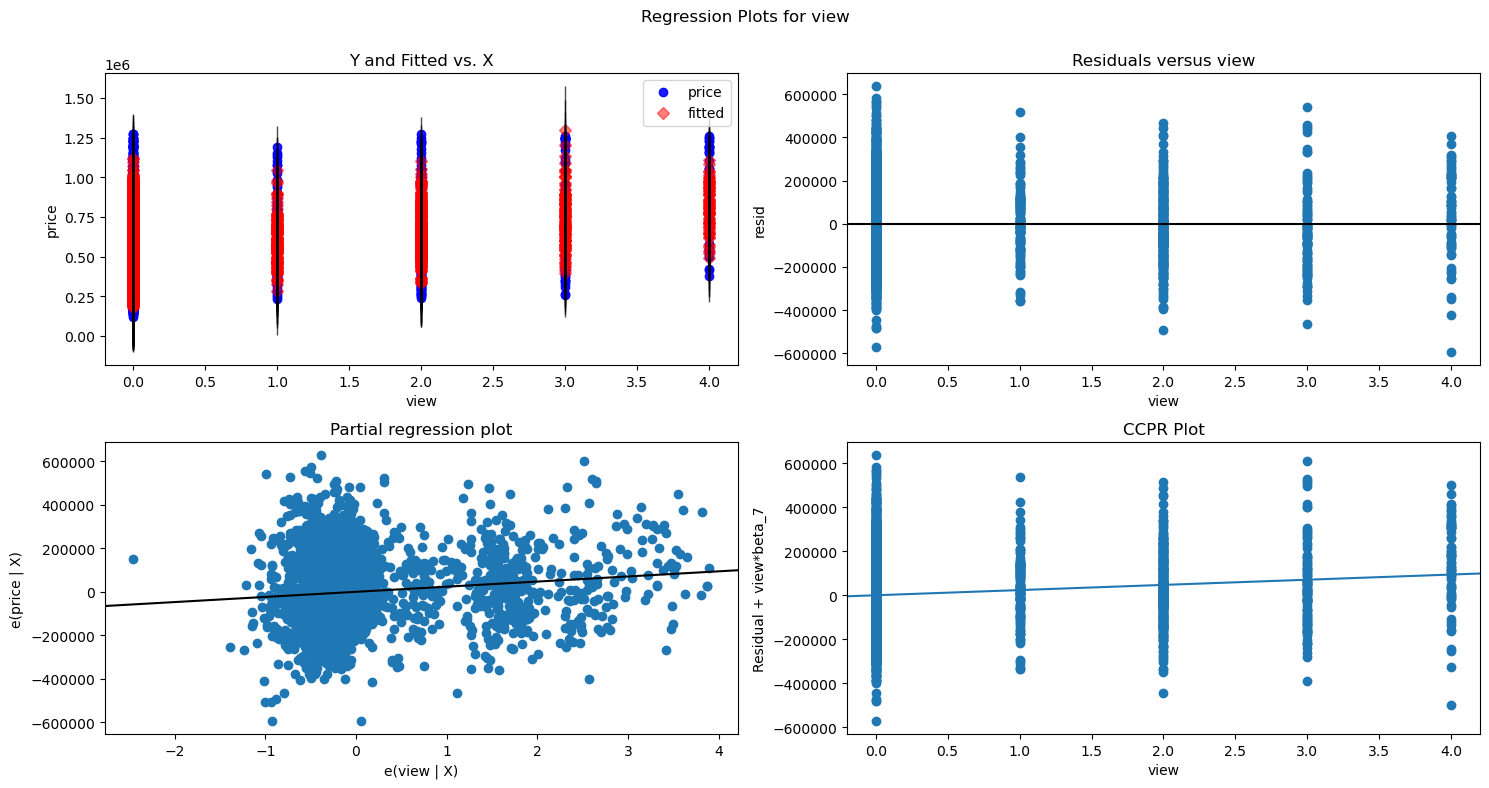

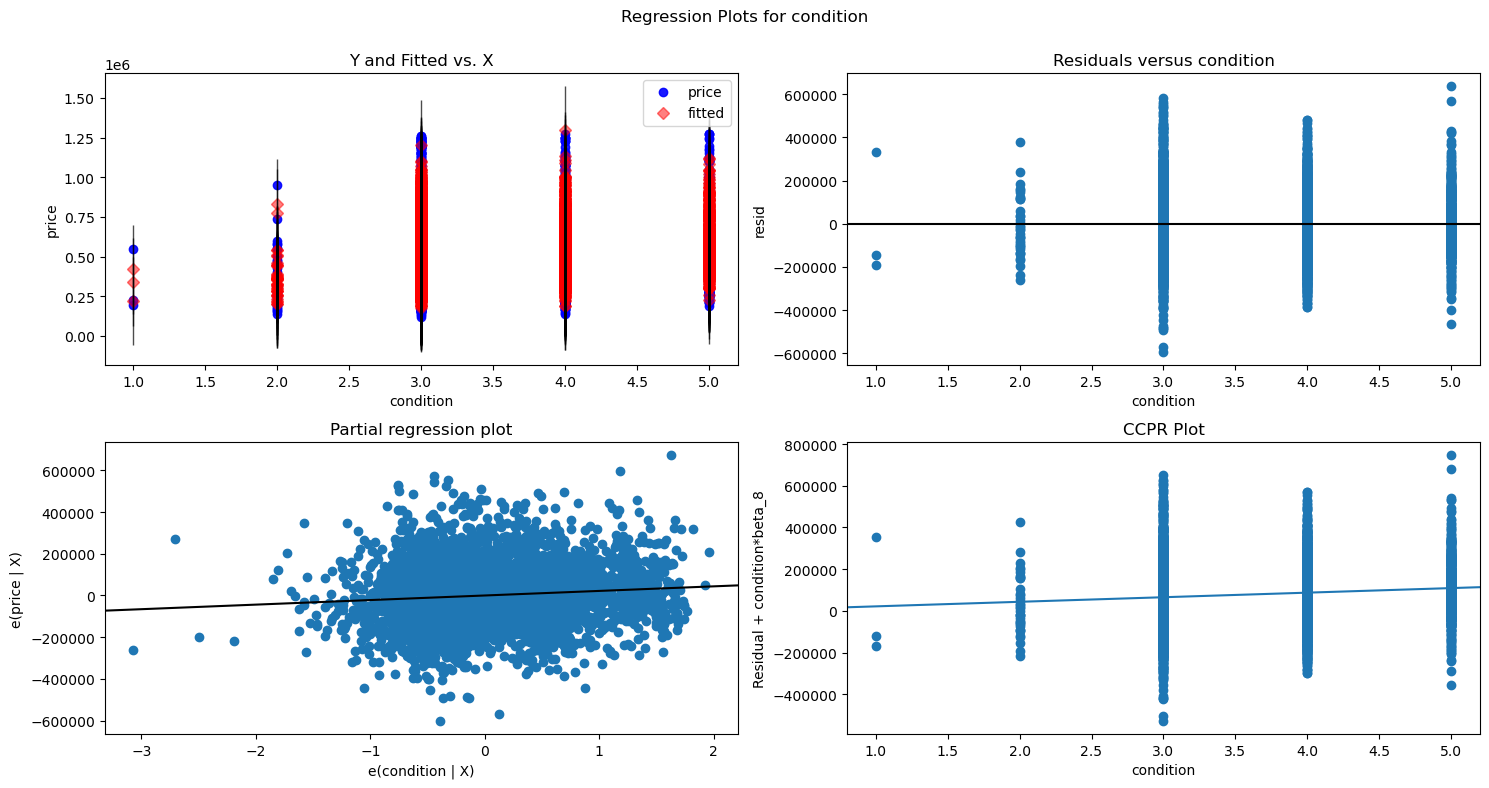

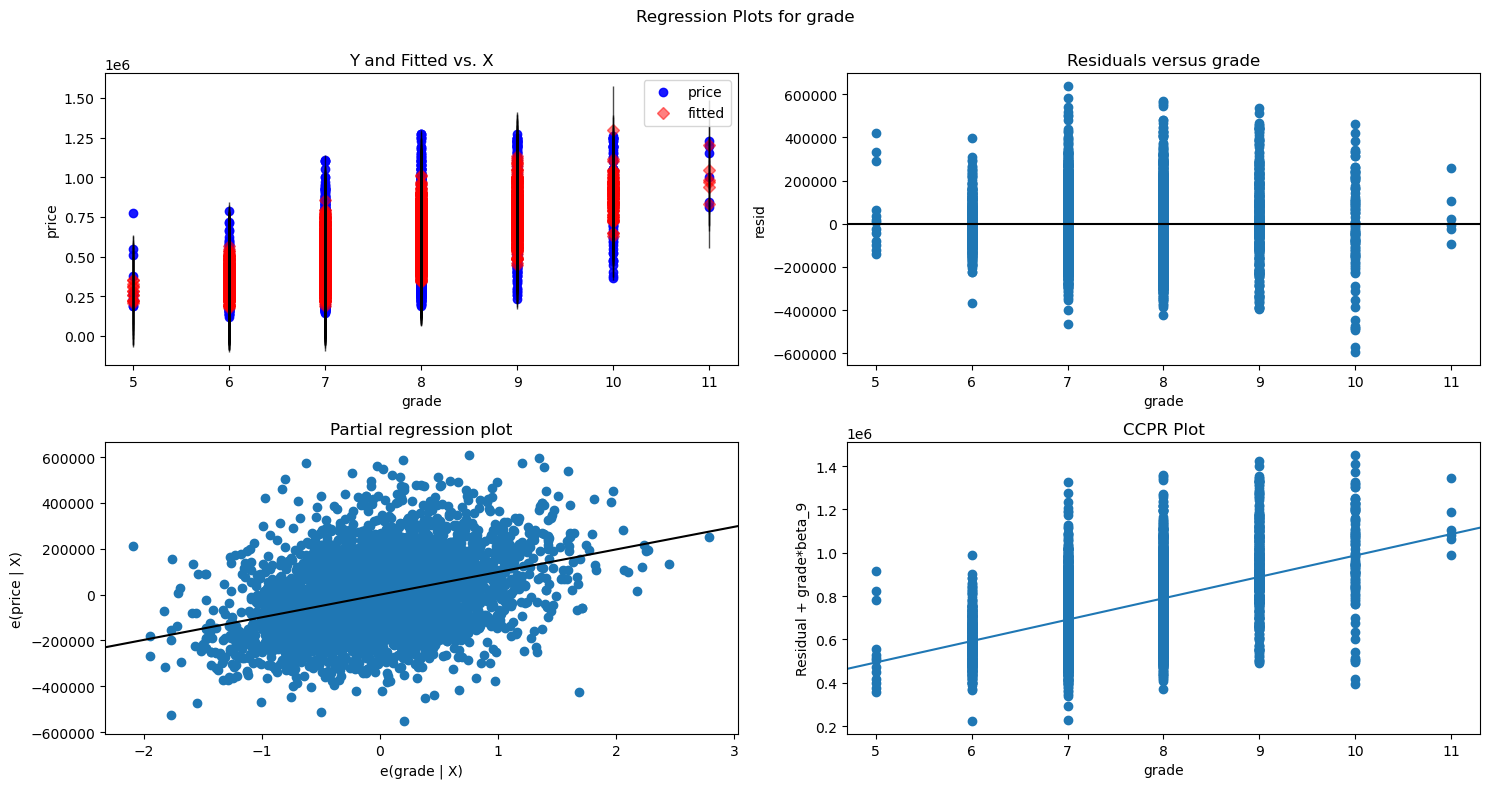

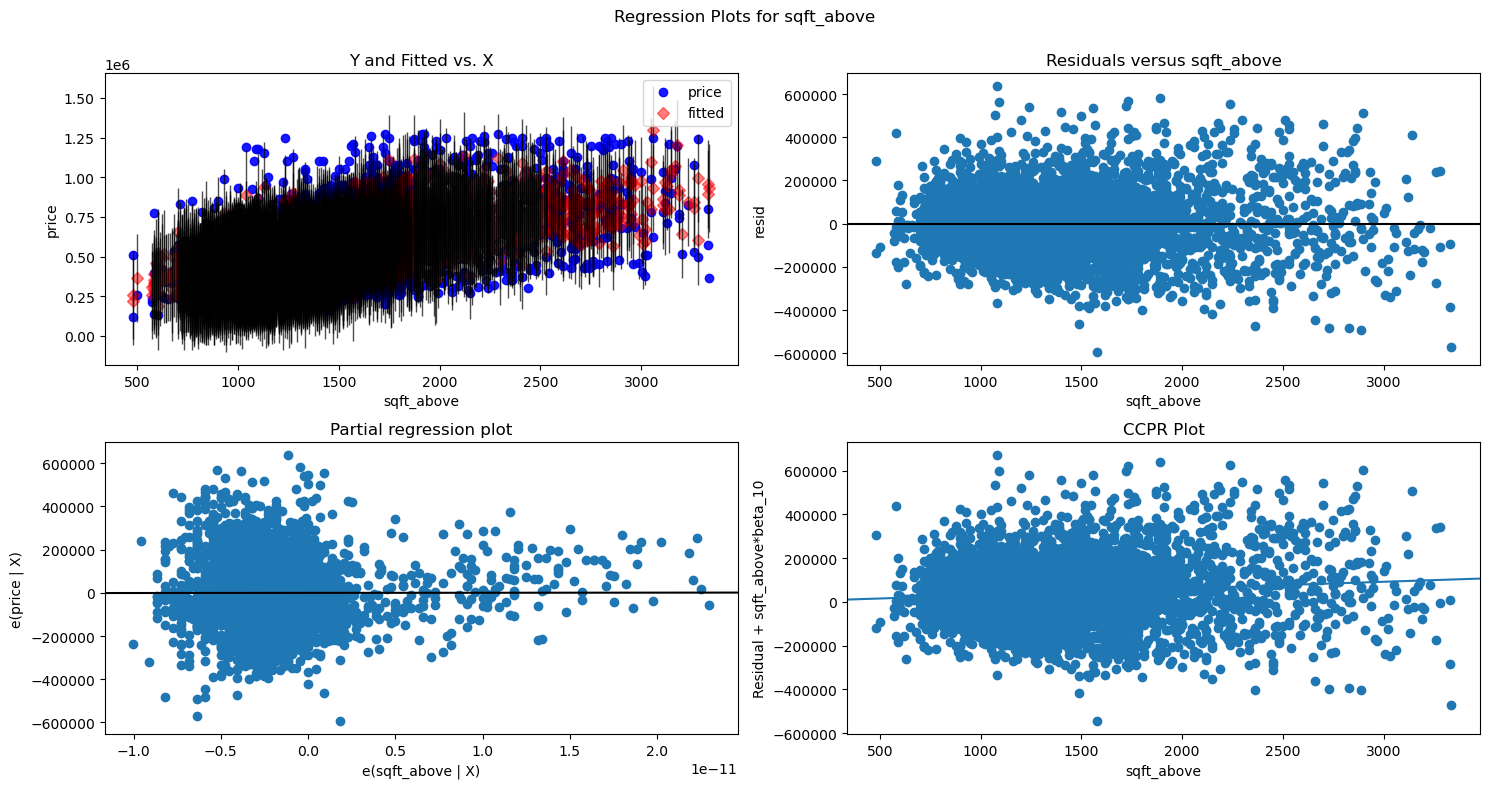

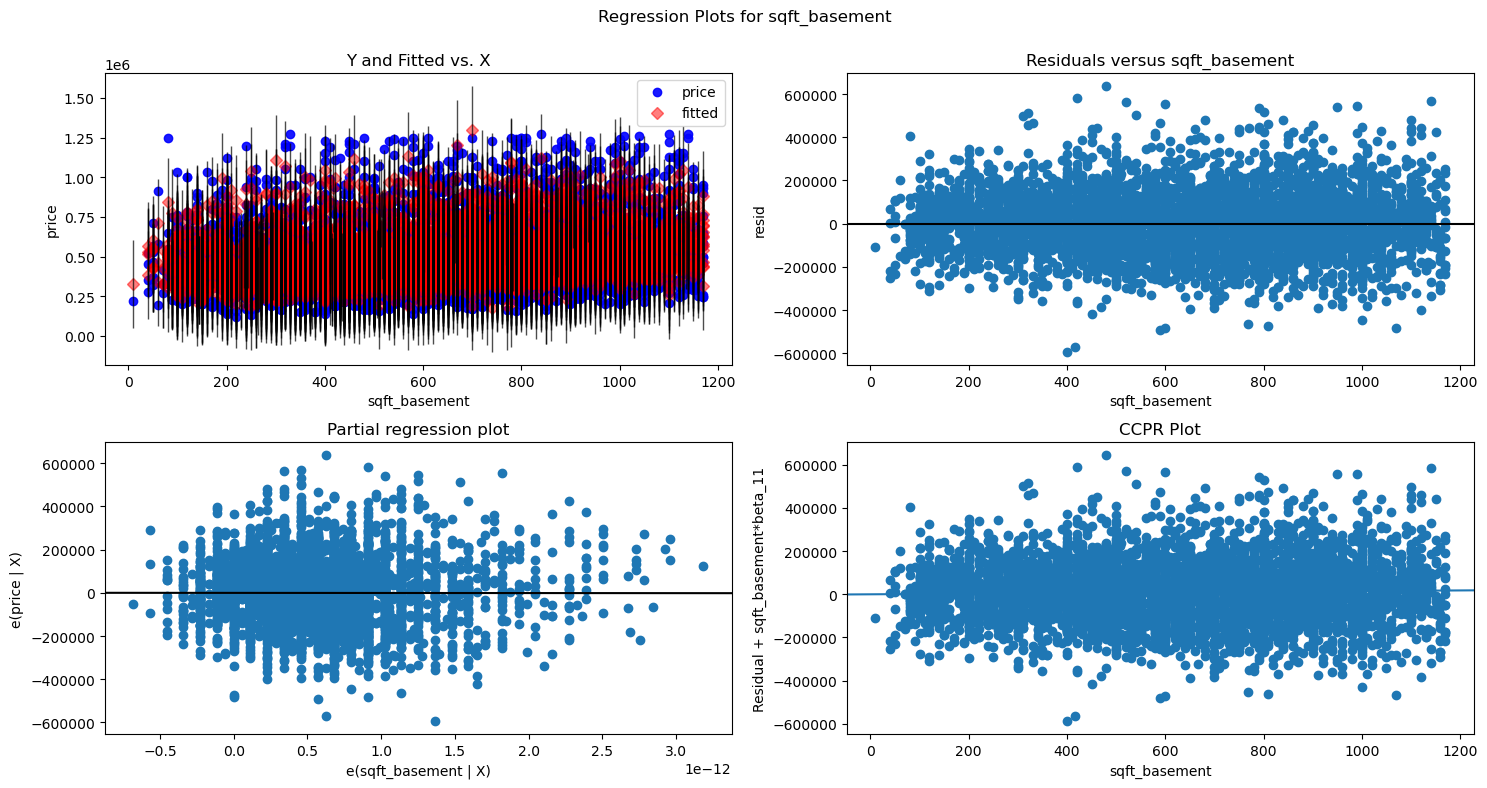

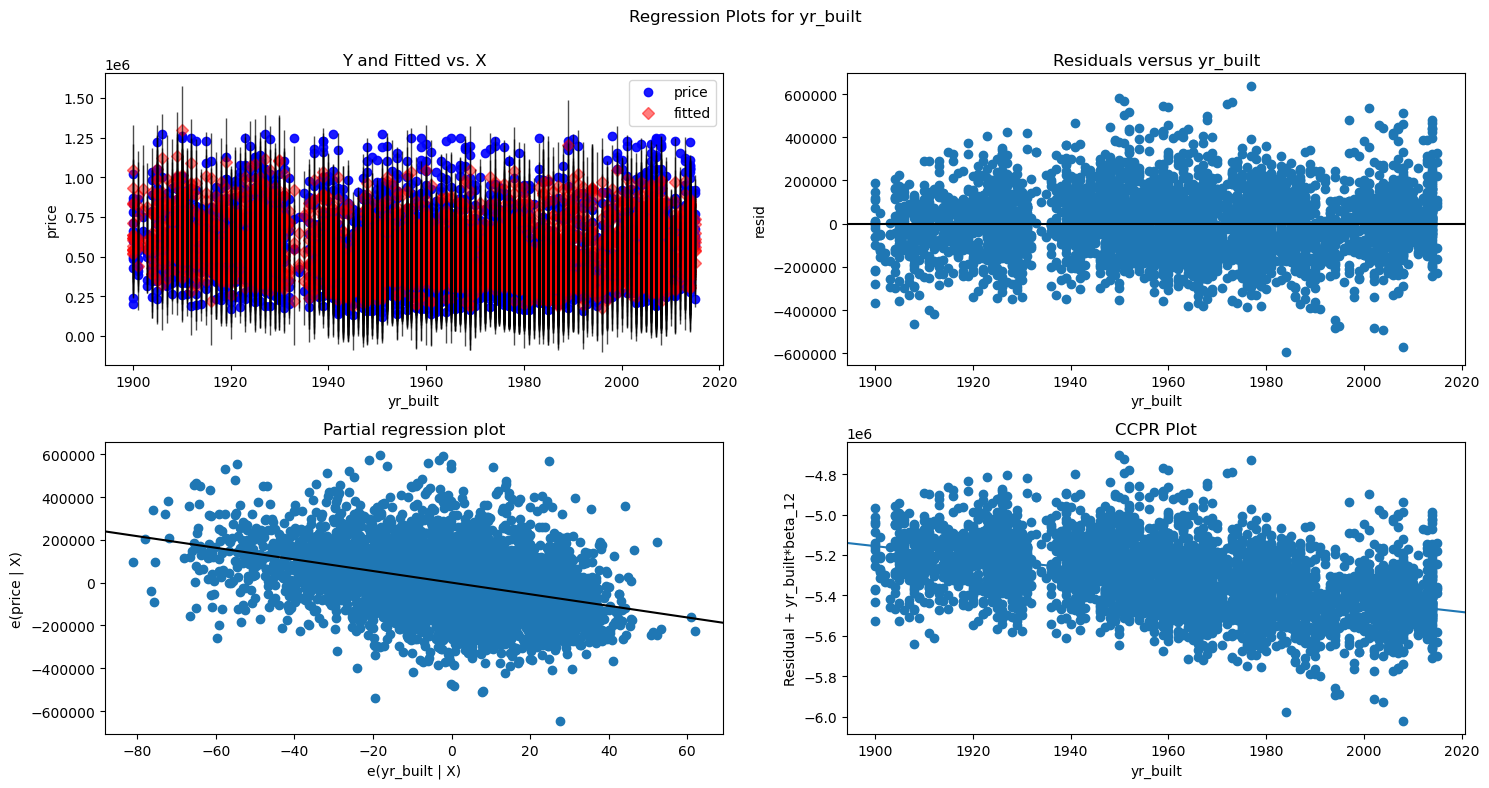

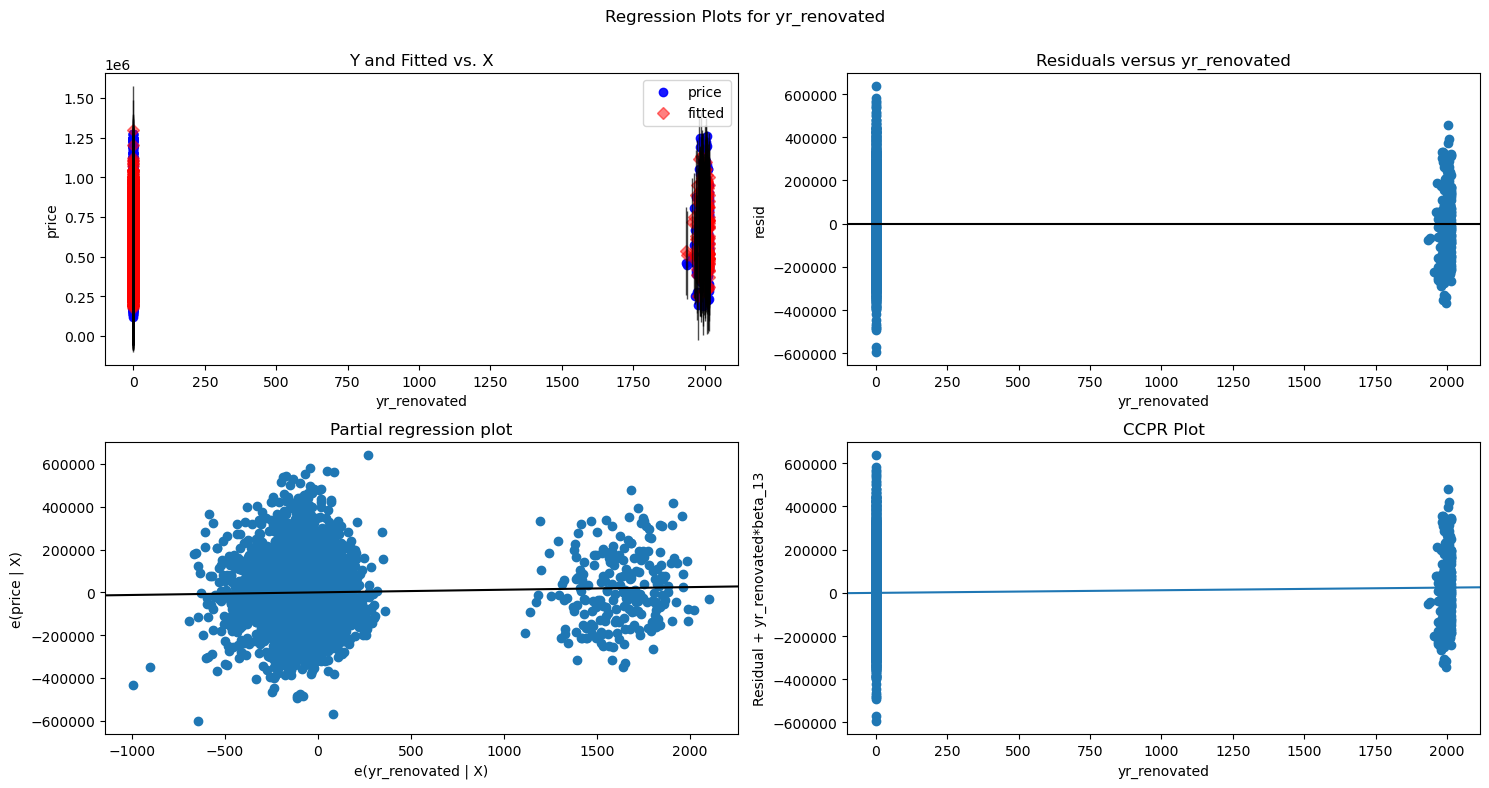

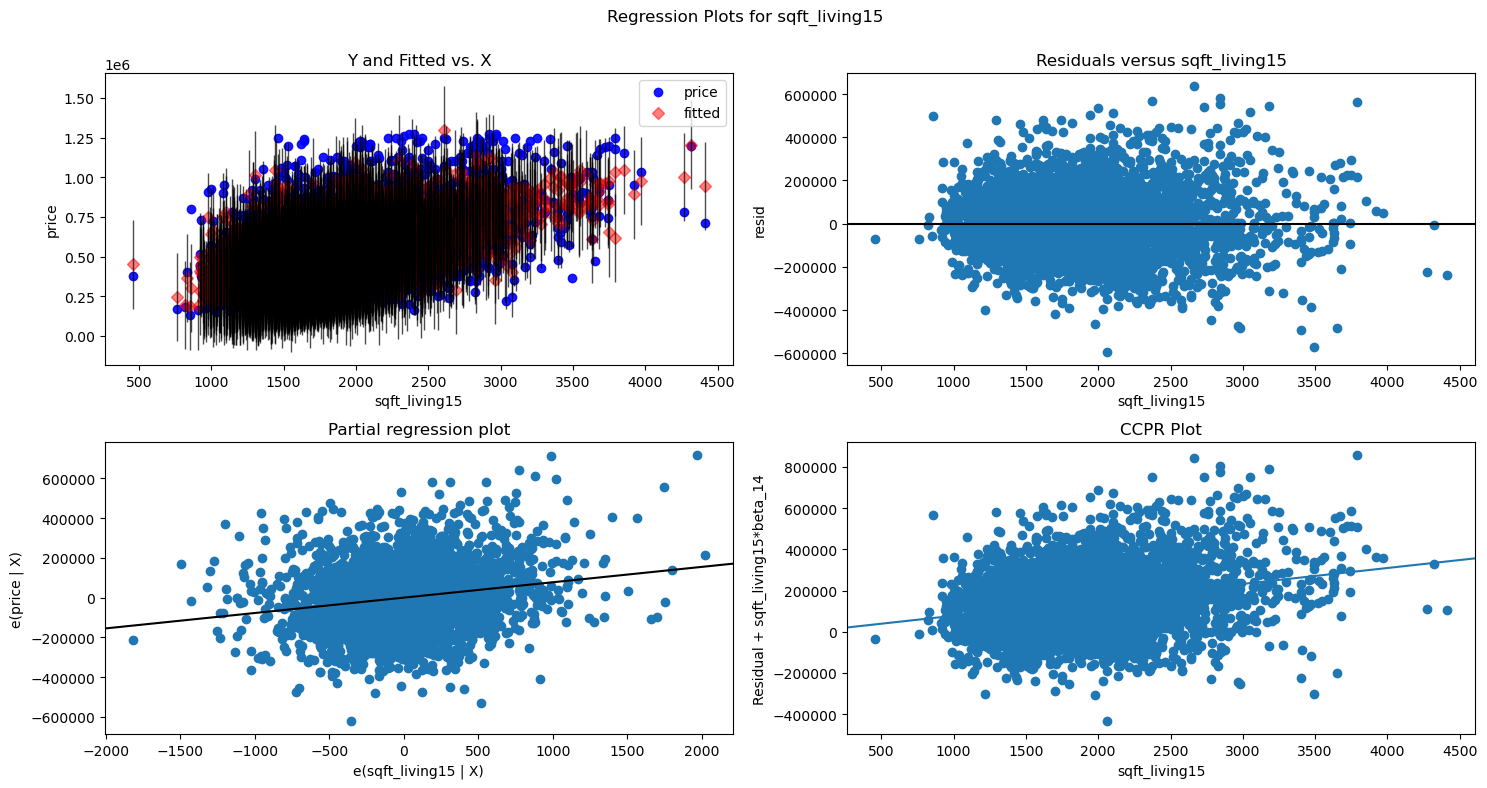

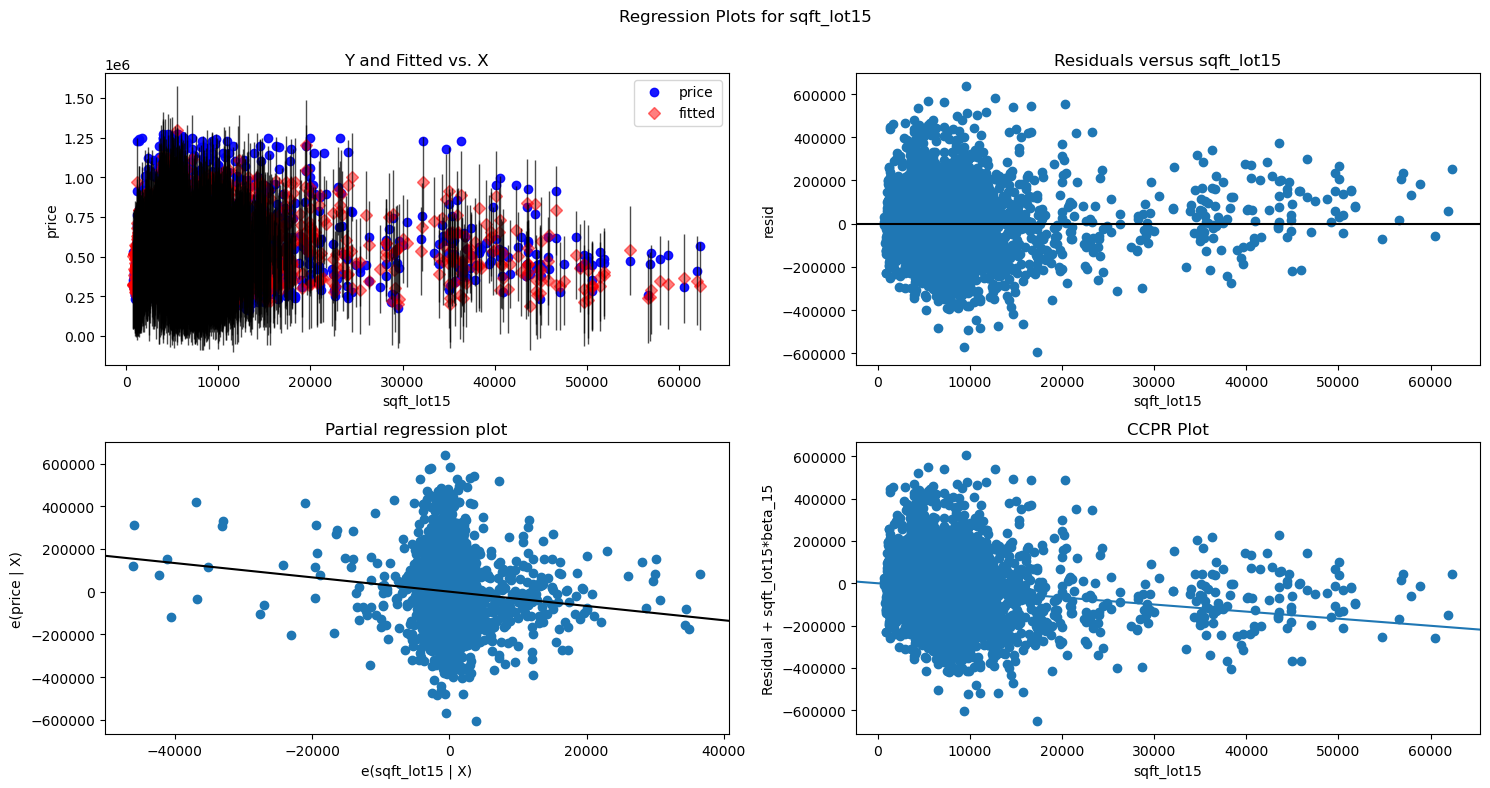

In [1084]:
for i, column in enumerate(df2.columns[1:20]):
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model_itr1, column, fig=fig)

## Iteration 2

In [1086]:
df_it2=df2
cont_var=['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']
dpred=df_it2[cont_var]
dpred

sqft_living  sqft_lot  sqft_above  sqft_basement  sqft_living15  \
1             2570      7242        2170          400.0           1690   
3             1960      5000        1050          910.0           1360   
6             1715      6819        1715            NaN           2238   
8             1780      7470        1050          730.0           1780   
11            1160      6000         860          300.0           1330   
...            ...       ...         ...            ...            ...   
21568         1260       900         940          320.0           1310   
21572         1210      1278        1020          190.0           1210   
21579         1530       981        1480           50.0           1530   
21590         3510      7200        2600          910.0           2050   
21591         1310      1294        1180          130.0           1330   

       sqft_lot15  
1            7639  
3            5000  
6            6819  
8            8113  
11           6000  
...           ...  
21568        1415  
21572        1118  
21579        1282  
21590        6200  
21591        1265  

[7127 rows x 6 columns]

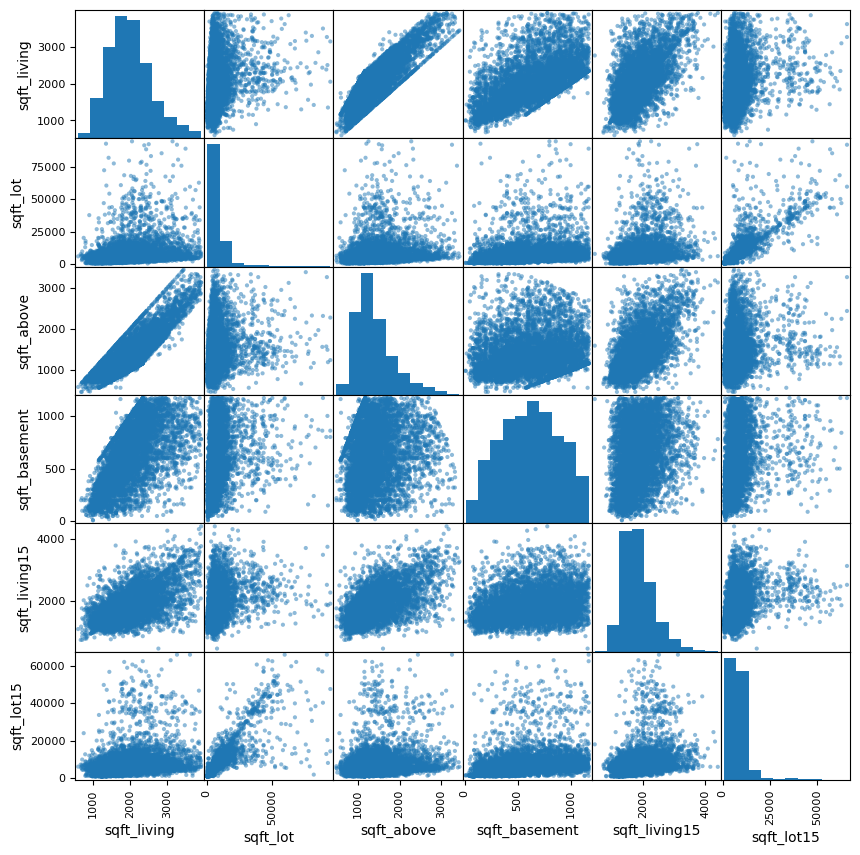

In [1087]:
pd.plotting.scatter_matrix(dpred,figsize=(10,10));
plt.show()

In [1088]:
dpred.corr()

sqft_living  sqft_lot  sqft_above  sqft_basement  \
sqft_living       1.000000  0.236563    0.861465       0.604035   
sqft_lot          0.236563  1.000000    0.191054       0.170261   
sqft_above        0.861465  0.191054    1.000000       0.152776   
sqft_basement     0.604035  0.170261    0.152776       1.000000   
sqft_living15     0.615284  0.313465    0.595943       0.269897   
sqft_lot15        0.233063  0.815394    0.185961       0.176685   

               sqft_living15  sqft_lot15  
sqft_living         0.615284    0.233063  
sqft_lot            0.313465    0.815394  
sqft_above          0.595943    0.185961  
sqft_basement       0.269897    0.176685  
sqft_living15       1.000000    0.339652  
sqft_lot15          0.339652    1.000000

In [1089]:
abs(dpred.corr())>0.75

sqft_living  sqft_lot  sqft_above  sqft_basement  \
sqft_living           True     False        True          False   
sqft_lot             False      True       False          False   
sqft_above            True     False        True          False   
sqft_basement        False     False       False           True   
sqft_living15        False     False       False          False   
sqft_lot15           False      True       False          False   

               sqft_living15  sqft_lot15  
sqft_living            False       False  
sqft_lot               False        True  
sqft_above             False       False  
sqft_basement          False       False  
sqft_living15           True       False  
sqft_lot15             False        True

In [1090]:
df3= dpred.corr().abs().stack().reset_index().sort_values(0,ascending=False)
df3['pairs']=list(zip(df3.level_0,df3.level_1))
df3.set_index(['pairs'],inplace=True)
df3.drop(columns=['level_0','level_1'],inplace=True)
df3.columns = ['cc']
df3.drop_duplicates(inplace=True)
df3

cc
pairs                                   
(sqft_living, sqft_living)      1.000000
(sqft_living, sqft_above)       0.861465
(sqft_lot15, sqft_lot)          0.815394
(sqft_living, sqft_living15)    0.615284
(sqft_living, sqft_basement)    0.604035
(sqft_above, sqft_living15)     0.595943
(sqft_lot15, sqft_living15)     0.339652
(sqft_living15, sqft_lot)       0.313465
(sqft_basement, sqft_living15)  0.269897
(sqft_lot, sqft_living)         0.236563
(sqft_living, sqft_lot15)       0.233063
(sqft_lot, sqft_above)          0.191054
(sqft_lot15, sqft_above)        0.185961
(sqft_basement, sqft_lot15)     0.176685
(sqft_basement, sqft_lot)       0.170261
(sqft_above, sqft_basement)     0.152776

In [1091]:
df3[(df3.cc>0.75)&(df3.cc<1)]

cc
pairs                              
(sqft_living, sqft_above)  0.861465
(sqft_lot15, sqft_lot)     0.815394

So we can see that 4 variables are highly correlated among each other, namely: 'sqft_above', 'sqft_living', 'sqft_lot15', 'sqft_lot'. So we would need to remove 3 of them to remove collinear features.

We can remove the  variables 'sqft_above', 'sqft_lot15' and 'sqft_lot'.

In [1092]:
df_it2 = df_it2.drop(['sqft_above','sqft_lot15','sqft_lot'],axis=1)

In [1093]:
df_it2.dropna(subset=['waterfront','view','condition','grade'],inplace=True)
wtr_dummy=pd.get_dummies(df_it2['waterfront'].astype(int),prefix='wtr',drop_first=True)
view_dummy=pd.get_dummies(df_it2['view'].astype(int),prefix='view',drop_first=True)
cond_dummy=pd.get_dummies(df_it2['condition'],prefix='cond',drop_first=True)
grad_dummy=pd.get_dummies(df_it2['grade'],prefix='grad',drop_first=True)

In [1094]:
flr=pd.cut(df_it2['floors'],[0,1.5,2.5,3.5],labels=[1,2,3])
flr_dummy=pd.get_dummies(flr,prefix='flr',drop_first=True)
bed=pd.cut(df_it2['bedrooms'],[0,3,6,max(df_it2['bedrooms'])],labels=[1,4,7])
bed_dummy=pd.get_dummies(bed,prefix='bed')
bed_dummy= bed_dummy.drop(bed_dummy.columns[2], axis=1)
bath=pd.cut(df_it2['bathrooms'],[0,2,4,max(df2['bathrooms'])],labels=[1,3,5])
bath_dummy=pd.get_dummies(bath,prefix='bath')
bath_dummy= bath_dummy.drop(bath_dummy.columns[2], axis=1)
a=np.arange(1900,2021,10)
y_built=pd.cut(df_it2['yr_built'],a,right=False,labels=a[0:-1],include_lowest=True)
ybuilt_dummy=pd.get_dummies(y_built,prefix='y_built',drop_first=True)
b=np.arange(1930,2021,10)
b=np.insert(b,0,0)
y_reno=pd.cut(df_it2['yr_renovated'],b,right=False,labels=b[0:-1], include_lowest=True)
yreno_dummy= pd.get_dummies(y_reno,prefix='y_reno',drop_first=True)
#c=np.arange(98000,98201,25)
#zipc=pd.cut(df_it2['zipcode'],c,right=False,labels=c[0:-1],include_lowest=True)
#zip_dummy= pd.get_dummies(zipc,prefix='zip',drop_first=True)

In [1095]:
df_it2 = df_it2.drop(['floors','waterfront','view','condition','grade','bedrooms','bathrooms','yr_renovated','yr_built'], axis=1)
df_it2 = pd.concat([df_it2, flr_dummy, wtr_dummy, view_dummy,cond_dummy,grad_dummy,bed_dummy,bath_dummy,yreno_dummy,ybuilt_dummy], axis=1)

In [1096]:
df_it2 = df_it2.replace({True: 1, False: 0})
df_it2.head()

price  sqft_living  sqft_basement  sqft_living15  flr_2  flr_3  wtr_1  \
1   538000.0         2570          400.0           1690      1      0      0   
3   604000.0         1960          910.0           1360      0      0      0   
6   257500.0         1715            NaN           2238      1      0      0   
8   229500.0         1780          730.0           1780      0      0      0   
11  468000.0         1160          300.0           1330      0      0      0   

    view_1  view_2  view_3  ...  y_built_1920  y_built_1930  y_built_1940  \
1        0       0       0  ...             0             0             0   
3        0       0       0  ...             0             0             0   
6        0       0       0  ...             0             0             0   
8        0       0       0  ...             0             0             0   
11       0       0       0  ...             0             0             1   

    y_built_1950  y_built_1960  y_built_1970  y_built_1980  y_built_1990  \
1              1             0             0             0             0   
3              0             1             0             0             0   
6              0             0             0             0             1   
8              0             1             0             0             0   
11             0             0             0             0             0   

    y_built_2000  y_built_2010  
1              0             0  
3              0             0  
6              0             0  
8              0             0  
11             0             0  

[5 rows x 46 columns]

In [1097]:
outcome='price'
x_cols=df_it2.iloc[:,1:46]
predictors='+'.join(x_cols)
formula=outcome+'~'+predictors
model_itr2=smf.ols(formula=formula,data=df_it2).fit()
model_itr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     180.3
Date:                Sat, 02 Dec 2023   Prob (F-statistic):               0.00
Time:                        09:02:07   Log-Likelihood:                -78919.
No. Observations:                5950   AIC:                         1.579e+05
Df Residuals:                    5904   BIC:                         1.582e+05
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.431e+05   1.71e+05      0.839      0.401   -1.91e+05    4.77e+05
sqft_living      77.9715      6.357     12.265      0.000      65.509      90.434
sqft_basement   -16.8894      9.866     -1.712      0.087     -36.230       2.452
sqft_living15    73.7357      5.237     14.079      0.000      63.469      84.003
flr_2          5.307e+04   7244.024      7.325      0.000    3.89e+04    6.73e+04
flr_3          1.322e+05   1.87e+04      7.062      0.000    9.55e+04    1.69e+05
wtr_1          8.433e+04   3.47e+04      2.430      0.015    1.63e+04    1.52e+05
view_1         3.375e+04   1.19e+04      2.847      0.004    1.05e+04     5.7e+04
view_2         3.408e+04   8248.884      4.131      0.000    1.79e+04    5.02e+04
view_3         4.743e+04   1.28e+04      3.697      0.000    2.23e+04    7.26e+04
view_4          1.54e+05   1.95e+04      7.917      0.000    1.16e+05    1.92e+05
cond_2         3.649e+04   8.45e+04      0.432      0.666   -1.29e+05    2.02e+05
cond_3         7.323e+04   8.18e+04      0.895      0.371   -8.72e+04    2.34e+05
cond_4         9.135e+04   8.18e+04      1.116      0.264   -6.91e+04    2.52e+05
cond_5         1.321e+05   8.19e+04      1.612      0.107   -2.86e+04    2.93e+05
grad_5        -7.133e+04   1.45e+05     -0.494      0.622   -3.55e+05    2.12e+05
grad_6        -1.596e+04    1.4e+05     -0.114      0.909   -2.91e+05    2.59e+05
grad_7         1.032e+05    1.4e+05      0.736      0.461   -1.72e+05    3.78e+05
grad_8          1.91e+05    1.4e+05      1.362      0.173    -8.4e+04    4.66e+05
grad_9         3.203e+05    1.4e+05      2.280      0.023    4.49e+04    5.96e+05
grad_10        3.909e+05   1.41e+05      2.772      0.006    1.14e+05    6.67e+05
grad_11        5.209e+05   1.47e+05      3.546      0.000    2.33e+05    8.09e+05
bed_1         -6741.2665   3.72e+04     -0.181      0.856   -7.97e+04    6.62e+04
bed_4         -9698.4242    3.7e+04     -0.262      0.793   -8.23e+04    6.29e+04
bath_1        -3.536e+04   3.87e+04     -0.913      0.361   -1.11e+05    4.06e+04
bath_3        -1.319e+04   3.84e+04     -0.344      0.731   -8.84e+04     6.2e+04
y_reno_1930   -7.883e+04   1.41e+05     -0.561      0.575   -3.55e+05    1.97e+05
y_reno_1940   -7.263e+04    1.4e+05     -0.518      0.604   -3.48e+05    2.02e+05
y_reno_1950   -2.265e+05    1.4e+05     -1.615      0.106   -5.01e+05    4.85e+04
y_reno_1960   -5.452e+04   6.32e+04     -0.863      0.388   -1.78e+05    6.93e+04
y_reno_1970   -1.023e+05   3.78e+04     -2.706      0.007   -1.76e+05   -2.82e+04
y_reno_1980   -2035.7843   2.57e+04     -0.079      0.937   -5.24e+04    4.83e+04
y_reno_1990     144.5890   2.23e+04      0.006      0.995   -4.36e+04    4.39e+04
y_reno_2000    7.884e+04   1.83e+04      4.316      0.000     4.3e+04    1.15e+05
y_reno_2010    3.818e+04   1.89e+04      2.021   

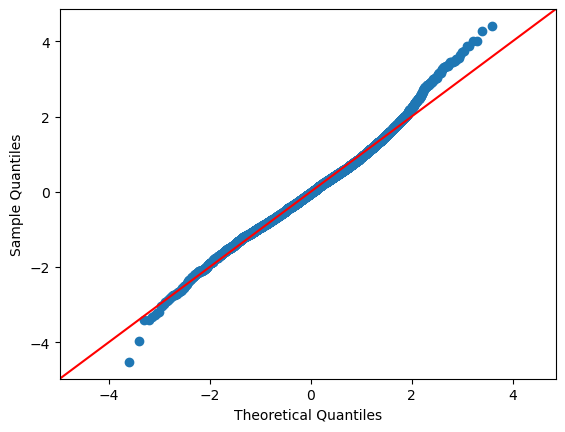

In [1056]:
    residuals = model_itr2.resid
    sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
    plt.show()

### Iteration 3

In [1098]:
df_miles=df_it2

In [1099]:
df_miles

price  sqft_living  sqft_basement  sqft_living15  flr_2  flr_3  \
1       538000.0         2570          400.0           1690      1      0   
3       604000.0         1960          910.0           1360      0      0   
6       257500.0         1715            NaN           2238      1      0   
8       229500.0         1780          730.0           1780      0      0   
11      468000.0         1160          300.0           1330      0      0   
...          ...          ...            ...            ...    ...    ...   
21568   380000.0         1260          320.0           1310      1      0   
21572   414500.0         1210          190.0           1210      1      0   
21579   520000.0         1530           50.0           1530      0      1   
21590  1010000.0         3510          910.0           2050      1      0   
21591   475000.0         1310          130.0           1330      1      0   

       wtr_1  view_1  view_2  view_3  ...  y_built_1920  y_built_1930  \
1          0       0       0       0  ...             0             0   
3          0       0       0       0  ...             0             0   
6          0       0       0       0  ...             0             0   
8          0       0       0       0  ...             0             0   
11         0       0       0       0  ...             0             0   
...      ...     ...     ...     ...  ...           ...           ...   
21568      0       0       0       0  ...             0             0   
21572      0       0       0       0  ...             0             0   
21579      0       0       0       0  ...             0             0   
21590      0       0       0       0  ...             0             0   
21591      0       0       0       0  ...             0             0   

       y_built_1940  y_built_1950  y_built_1960  y_built_1970  y_built_1980  \
1                 0             1             0             0             0   
3                 0             0             1             0             0   
6                 0             0             0             0             0   
8                 0             0             1             0             0   
11                1             0             0             0             0   
...             ...           ...           ...           ...           ...   
21568             0             0             0             0             0   
21572             0             0             0             0             0   
21579             0             0             0             0             0   
21590             0             0             0             0             0   
21591             0             0             0             0             0   

       y_built_1990  y_built_2000  y_built_2010  
1                 0             0             0  
3                 0             0             0  
6                 1             0             0  
8                 0             0             0  
11                0             0             0  
...             ...           ...           ...  
21568             0             1             0  
21572             0             1             0  
21579             0             1             0  
21590             0             1             0  
21591             0             1             0  

[6317 rows x 46 columns]

In [1100]:
df_it3=df_miles
df_it3

price  sqft_living  sqft_basement  sqft_living15  flr_2  flr_3  \
1       538000.0         2570          400.0           1690      1      0   
3       604000.0         1960          910.0           1360      0      0   
6       257500.0         1715            NaN           2238      1      0   
8       229500.0         1780          730.0           1780      0      0   
11      468000.0         1160          300.0           1330      0      0   
...          ...          ...            ...            ...    ...    ...   
21568   380000.0         1260          320.0           1310      1      0   
21572   414500.0         1210          190.0           1210      1      0   
21579   520000.0         1530           50.0           1530      0      1   
21590  1010000.0         3510          910.0           2050      1      0   
21591   475000.0         1310          130.0           1330      1      0   

       wtr_1  view_1  view_2  view_3  ...  y_built_1920  y_built_1930  \
1          0       0       0       0  ...             0             0   
3          0       0       0       0  ...             0             0   
6          0       0       0       0  ...             0             0   
8          0       0       0       0  ...             0             0   
11         0       0       0       0  ...             0             0   
...      ...     ...     ...     ...  ...           ...           ...   
21568      0       0       0       0  ...             0             0   
21572      0       0       0       0  ...             0             0   
21579      0       0       0       0  ...             0             0   
21590      0       0       0       0  ...             0             0   
21591      0       0       0       0  ...             0             0   

       y_built_1940  y_built_1950  y_built_1960  y_built_1970  y_built_1980  \
1                 0             1             0             0             0   
3                 0             0             1             0             0   
6                 0             0             0             0             0   
8                 0             0             1             0             0   
11                1             0             0             0             0   
...             ...           ...           ...           ...           ...   
21568             0             0             0             0             0   
21572             0             0             0             0             0   
21579             0             0             0             0             0   
21590             0             0             0             0             0   
21591             0             0             0             0             0   

       y_built_1990  y_built_2000  y_built_2010  
1                 0             0             0  
3                 0             0             0  
6                 1             0             0  
8                 0             0             0  
11                0             0             0  
...             ...           ...           ...  
21568             0             1             0  
21572             0             1             0  
21579             0             1             0  
21590             0             1             0  
21591             0             1             0  

[6317 rows x 46 columns]

array([[<Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='sqft_living', ylabel='price'>,
        <Axes: xlabel='sqft_living15', ylabel='price'>],
       [<Axes: xlabel='price', ylabel='sqft_living'>,
        <Axes: xlabel='sqft_living', ylabel='sqft_living'>,
        <Axes: xlabel='sqft_living15', ylabel='sqft_living'>],
       [<Axes: xlabel='price', ylabel='sqft_living15'>,
        <Axes: xlabel='sqft_living', ylabel='sqft_living15'>,
        <Axes: xlabel='sqft_living15', ylabel='sqft_living15'>]],
      dtype=object)

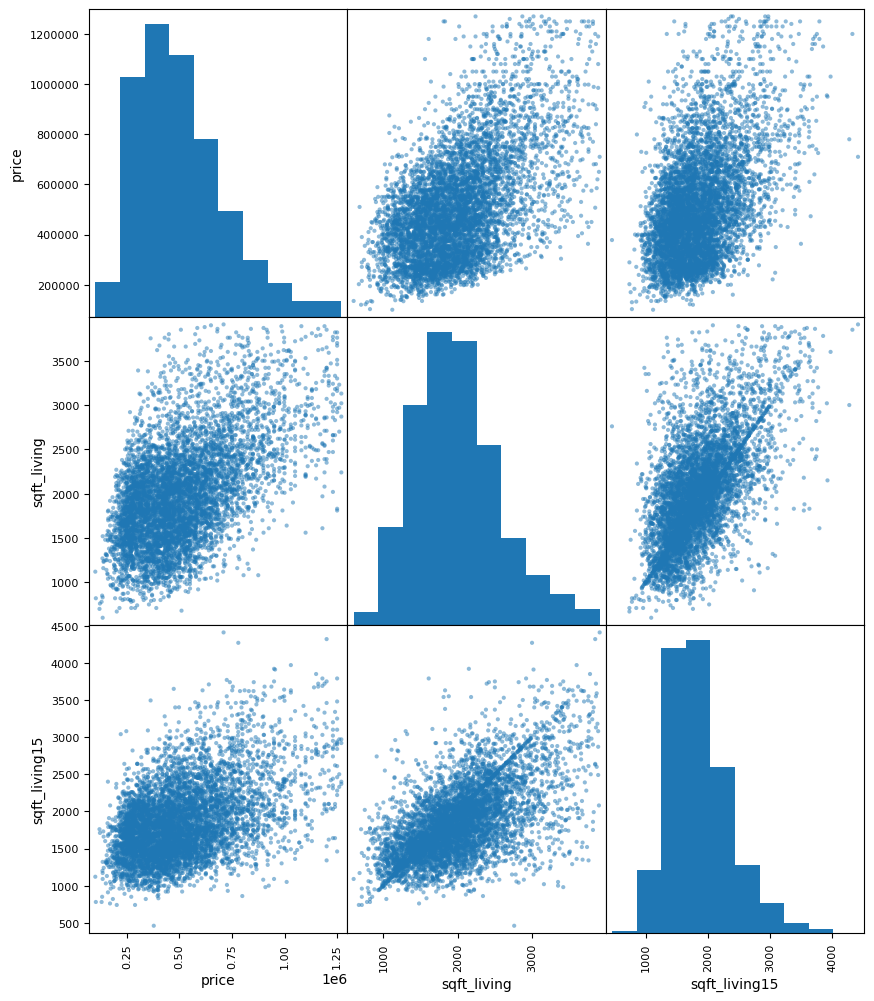

In [1101]:
Logtr_columns=['price','sqft_living','sqft_living15']
pd.plotting.scatter_matrix(df_it3[Logtr_columns],figsize=(10,12))

array([[<Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='sqft_living', ylabel='price'>,
        <Axes: xlabel='sqft_living15', ylabel='price'>],
       [<Axes: xlabel='price', ylabel='sqft_living'>,
        <Axes: xlabel='sqft_living', ylabel='sqft_living'>,
        <Axes: xlabel='sqft_living15', ylabel='sqft_living'>],
       [<Axes: xlabel='price', ylabel='sqft_living15'>,
        <Axes: xlabel='sqft_living', ylabel='sqft_living15'>,
        <Axes: xlabel='sqft_living15', ylabel='sqft_living15'>]],
      dtype=object)

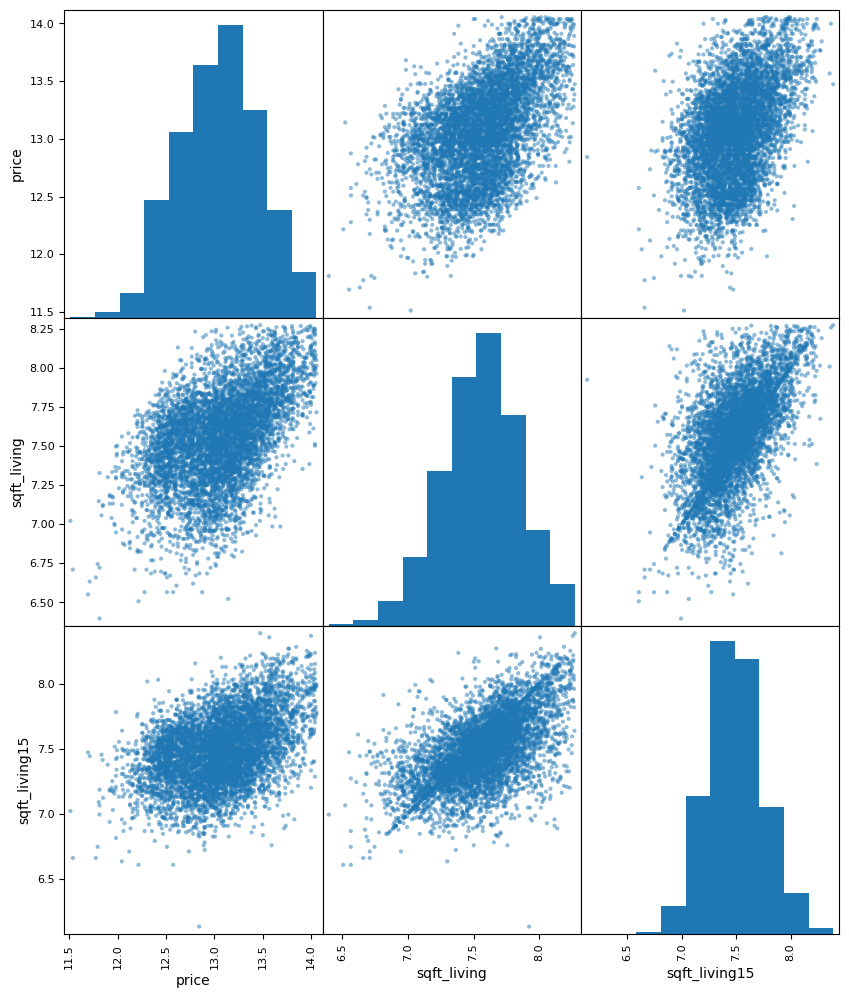

In [1103]:
log_transform=np.log(df_it3[Logtr_columns])   
pd.plotting.scatter_matrix(log_transform,figsize=(10,12))

In [1104]:
log_transform.head()

price  sqft_living  sqft_living15
1   13.195614     7.851661       7.432484
3   13.311329     7.580700       7.215240
6   12.458775     7.447168       7.713338
8   12.343658     7.484369       7.484369
11  13.056224     7.056175       7.192934

In [1105]:
log_price=log_transform['price']
log_sqliv=log_transform['sqft_living']
log_sqbas=df_it3['sqft_basement']
log_sqliv15=log_transform['sqft_living15']


scaled_price = (log_price - np.mean(log_price)) / np.sqrt(np.var(log_price))
#scaled_yr = (dat_long - min(dat_long)) / (max(dat_long) - min(dat_long))
scaled_sqliv = (log_sqliv - np.mean(log_sqliv)) / np.sqrt(np.var(log_sqliv))
scaled_sqbas = (log_sqbas - np.mean(log_sqbas)) / np.sqrt(np.var(log_sqbas))
scaled_sqliv15 = (log_sqliv15 - np.mean(log_sqliv15)) / np.sqrt(np.var(log_sqliv15))

In [1106]:
df_it3=df_it3.drop(['sqft_living','sqft_basement','sqft_living15','price'], axis=1)
df_it3.head()

flr_2  flr_3  wtr_1  view_1  view_2  view_3  view_4  cond_2  cond_3  \
1       1      0      0       0       0       0       0       0       1   
3       0      0      0       0       0       0       0       0       0   
6       1      0      0       0       0       0       0       0       1   
8       0      0      0       0       0       0       0       0       1   
11      0      0      0       0       0       0       0       0       0   

    cond_4  ...  y_built_1920  y_built_1930  y_built_1940  y_built_1950  \
1        0  ...             0             0             0             1   
3        0  ...             0             0             0             0   
6        0  ...             0             0             0             0   
8        0  ...             0             0             0             0   
11       1  ...             0             0             1             0   

    y_built_1960  y_built_1970  y_built_1980  y_built_1990  y_built_2000  \
1              0             0             0             0             0   
3              1             0             0             0             0   
6              0             0             0             1             0   
8              1             0             0             0             0   
11             0             0             0             0             0   

    y_built_2010  
1              0  
3              0  
6              0  
8              0  
11             0  

[5 rows x 42 columns]

In [1107]:
df_it3 = pd.concat([scaled_price,scaled_sqliv,scaled_sqbas,scaled_sqliv15, df_it3],axis=1)
df_it3

price  sqft_living  sqft_basement  sqft_living15  flr_2  flr_3  \
1      0.337097     1.004379      -0.778401      -0.226905      1      0   
3      0.614840     0.081984       1.066219      -1.068292      0      0   
6     -1.431478    -0.372578            NaN       0.860844      1      0   
8     -1.707784    -0.245942       0.415177      -0.025955      0      0   
11     0.002529    -1.703580      -1.140091      -1.154682      0      0   
...         ...          ...            ...            ...    ...    ...   
21568 -0.497429    -1.422084      -1.067753      -1.213365      1      0   
21572 -0.288846    -1.559923      -1.537950      -1.520908      1      0   
21579  0.255418    -0.761147      -2.044317      -0.612118      0      1   
21590  1.848868     2.065490       1.066219       0.521016      1      0   
21591  0.038164    -1.289610      -1.754964      -1.154682      1      0   

       wtr_1  view_1  view_2  view_3  ...  y_built_1920  y_built_1930  \
1          0       0       0       0  ...             0             0   
3          0       0       0       0  ...             0             0   
6          0       0       0       0  ...             0             0   
8          0       0       0       0  ...             0             0   
11         0       0       0       0  ...             0             0   
...      ...     ...     ...     ...  ...           ...           ...   
21568      0       0       0       0  ...             0             0   
21572      0       0       0       0  ...             0             0   
21579      0       0       0       0  ...             0             0   
21590      0       0       0       0  ...             0             0   
21591      0       0       0       0  ...             0             0   

       y_built_1940  y_built_1950  y_built_1960  y_built_1970  y_built_1980  \
1                 0             1             0             0             0   
3                 0             0             1             0             0   
6                 0             0             0             0             0   
8                 0             0             1             0             0   
11                1             0             0             0             0   
...             ...           ...           ...           ...           ...   
21568             0             0             0             0             0   
21572             0             0             0             0             0   
21579             0             0             0             0             0   
21590             0             0             0             0             0   
21591             0             0             0             0             0   

       y_built_1990  y_built_2000  y_built_2010  
1                 0             0             0  
3                 0             0             0  
6                 1             0             0  
8                 0             0             0  
11                0             0             0  
...             ...           ...           ...  
21568             0             1             0  
21572             0             1             0  
21579             0             1             0  
21590             0             1             0  
21591             0             1             0  

[6317 rows x 46 columns]

In [1108]:
outcome='price'
x_cols=df_it3.iloc[:,1:46]
predictors='+'.join(x_cols)
formula=outcome+'~'+predictors
model_itr3=smf.ols(formula=formula,data=df_it3).fit()
model_itr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     149.5
Date:                Sat, 02 Dec 2023   Prob (F-statistic):               0.00
Time:                        09:15:58   Log-Likelihood:                -6145.1
No. Observations:                5950   AIC:                         1.238e+04
Df Residuals:                    5904   BIC:                         1.269e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.3922      0.829     -0.473      0.636      -2.017       1.233
sqft_living       0.1758      0.018      9.672      0.000       0.140       0.211
sqft_basement    -0.0039      0.014     -0.286      0.775      -0.031       0.023
sqft_living15     0.1804      0.012     14.496      0.000       0.156       0.205
flr_2             0.2233      0.035      6.377      0.000       0.155       0.292
flr_3             0.5679      0.091      6.215      0.000       0.389       0.747
wtr_1             0.3447      0.169      2.037      0.042       0.013       0.676
view_1            0.1792      0.058      3.100      0.002       0.066       0.293
view_2            0.1535      0.040      3.816      0.000       0.075       0.232
view_3            0.1749      0.063      2.797      0.005       0.052       0.297
view_4            0.5135      0.095      5.420      0.000       0.328       0.699
cond_2            0.1873      0.412      0.454      0.650      -0.621       0.995
cond_3            0.5335      0.399      1.337      0.181      -0.249       1.316
cond_4            0.6267      0.399      1.570      0.116      -0.156       1.409
cond_5            0.7948      0.400      1.989      0.047       0.011       1.578
grad_5           -0.7507      0.705     -1.064      0.287      -2.134       0.632
grad_6           -0.2883      0.685     -0.421      0.674      -1.631       1.054
grad_7            0.3692      0.685      0.539      0.590      -0.973       1.711
grad_8            0.8192      0.685      1.196      0.232      -0.524       2.162
grad_9            1.2775      0.686      1.861      0.063      -0.068       2.623
grad_10           1.5372      0.689      2.231      0.026       0.187       2.888
grad_11           1.9227      0.717      2.680      0.007       0.516       3.329
bed_1            -0.1107      0.181     -0.611      0.541      -0.466       0.244
bed_4            -0.1232      0.180     -0.683      0.494      -0.477       0.230
bath_1           -0.1299      0.188     -0.690      0.490      -0.499       0.239
bath_3           -0.0314      0.186     -0.169      0.866      -0.397       0.334
y_reno_1930      -0.1577      0.686     -0.230      0.818      -1.503       1.187
y_reno_1940      -0.1988      0.684     -0.291      0.771      -1.539       1.142
y_reno_1950      -0.7756      0.684     -1.134      0.257      -2.116       0.565
y_reno_1960      -0.2345      0.308     -0.761      0.447      -0.839       0.370
y_reno_1970      -0.4299      0.184     -2.333      0.020      -0.791      -0.069
y_reno_1980      -0.0450      0.125     -0.360      0.719      -0.290       0.200
y_reno_1990      -0.0704      0.109     -0.647      0.518      -0.284       0.143
y_reno_2000       0.2344      0.089      2.631      0.009       0.060       0.409
y_reno_2010       0.1829      0.092      1.985   

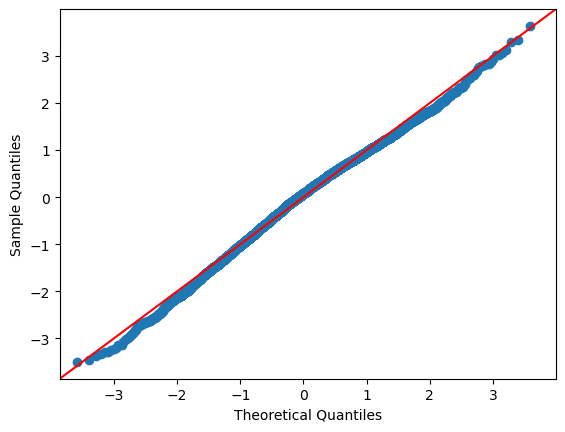

In [1109]:
residuals = model_itr3.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

In [1110]:

def forward_regression(X, y,
                       threshold_in,
                       verbose=False):
    initial_list = []
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        if not changed:
            break

    return included

def backward_regression(X, y,
                           threshold_out,
                           verbose=False):
    included=list(X.columns)
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [1111]:
df_it3=df_it3.dropna()
result = forward_regression(df_it3.iloc[:,1:46], df_it3['price'], 0.01,verbose=True)
print('resulting features:')
print(result)

Add  sqft_living                    with p-value 0.0
Add  grad_7                         with p-value 7.25557e-75
Add  grad_6                         with p-value 7.45733e-67
Add  y_built_1920                   with p-value 1.10891e-71
Add  y_built_1910                   with p-value 2.38179e-50
Add  grad_8                         with p-value 4.11809e-54
Add  y_built_1940                   with p-value 1.12541e-53
Add  sqft_living15                  with p-value 2.20662e-32
Add  y_built_1930                   with p-value 4.40886e-31
Add  grad_5                         with p-value 5.01661e-31
Add  y_built_1950                   with p-value 1.83815e-27
Add  flr_2                          with p-value 5.80296e-22
Add  cond_5                         with p-value 6.51326e-17
Add  flr_3                          with p-value 6.43385e-14
Add  view_4                         with p-value 3.30238e-11
Add  y_built_1990                   with p-value 8.84719e-09
Add  y_built_1970               

In [1112]:
result2 = backward_regression(df_it3.iloc[:,1:46], df_it3['price'], 0.05,verbose=True)
print('resulting features:')
print(result2)

Drop bath_3                         with p-value 0.866114
Drop y_reno_1930                    with p-value 0.818228
Drop sqft_basement                  with p-value 0.773393
Drop y_reno_1940                    with p-value 0.771992
Drop y_reno_1980                    with p-value 0.722807
Drop grad_6                         with p-value 0.676347
Drop cond_2                         with p-value 0.646516
Drop y_built_1920                   with p-value 0.591555
Drop bed_1                          with p-value 0.523026
Drop y_reno_1990                    with p-value 0.525562
Drop bed_4                          with p-value 0.512159
Drop y_reno_1960                    with p-value 0.451464
Drop y_reno_1950                    with p-value 0.263149
Drop y_built_1910                   with p-value 0.146231
resulting features:
['sqft_living', 'sqft_living15', 'flr_2', 'flr_3', 'wtr_1', 'view_1', 'view_2', 'view_3', 'view_4', 'cond_3', 'cond_4', 'cond_5', 'grad_5', 'grad_7', 'grad_8', 'grad_9'

In [1115]:
df_it4=df_it3.drop(['bath_3','y_reno_1930','sqft_basement','y_reno_1940','y_reno_1980','grad_6','cond_2','y_built_1920','bed_1','y_reno_1990','y_reno_1960','bed_4','y_reno_1950','y_built_1910'],axis=1)

In [1116]:
df_it4.head()

price  sqft_living  sqft_living15  flr_2  flr_3  wtr_1  view_1  view_2  \
1   0.337097     1.004379      -0.226905      1      0      0       0       0   
3   0.614840     0.081984      -1.068292      0      0      0       0       0   
8  -1.707784    -0.245942      -0.025955      0      0      0       0       0   
11  0.002529    -1.703580      -1.154682      0      0      0       0       0   
15  0.791011     1.473810       0.687423      1      0      0       0       0   

    view_3  view_4  ...  y_reno_2010  y_built_1930  y_built_1940  \
1        0       0  ...            0             0             0   
3        0       0  ...            0             0             0   
8        0       0  ...            0             0             0   
11       0       0  ...            0             0             1   
15       1       0  ...            0             0             0   

    y_built_1950  y_built_1960  y_built_1970  y_built_1980  y_built_1990  \
1              1             0             0             0             0   
3              0             1             0             0             0   
8              0             1             0             0             0   
11             0             0             0             0             0   
15             0             0             1             0             0   

    y_built_2000  y_built_2010  
1              0             0  
3              0             0  
8              0             0  
11             0             0  
15             0             0  

[5 rows x 32 columns]

In [1117]:
outcome='price'
x_cols=df_it4.iloc[:,1:32]
predictors='+'.join(x_cols)
formula=outcome+'~'+predictors
model_itr3=smf.ols(formula=formula,data=df_it4).fit()
model_itr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sat, 02 Dec 2023   Prob (F-statistic):               0.00
Time:                        09:28:40   Log-Likelihood:                -6148.3
No. Observations:                5950   AIC:                         1.236e+04
Df Residuals:                    5918   BIC:                         1.257e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.6147      0.108     -5.684      0.000      -0.827      -0.403
sqft_living       0.1697      0.013     13.061      0.000       0.144       0.195
sqft_living15     0.1804      0.012     14.700      0.000       0.156       0.204
flr_2             0.2261      0.033      6.780      0.000       0.161       0.291
flr_3             0.5771      0.090      6.447      0.000       0.402       0.753
wtr_1             0.3390      0.168      2.013      0.044       0.009       0.669
view_1            0.1791      0.058      3.102      0.002       0.066       0.292
view_2            0.1525      0.040      3.804      0.000       0.074       0.231
view_3            0.1730      0.062      2.782      0.005       0.051       0.295
view_4            0.5154      0.094      5.455      0.000       0.330       0.701
cond_3            0.3594      0.101      3.567      0.000       0.162       0.557
cond_4            0.4533      0.101      4.480      0.000       0.255       0.652
cond_5            0.6196      0.104      5.958      0.000       0.416       0.824
grad_5           -0.4832      0.174     -2.770      0.006      -0.825      -0.141
grad_7            0.6551      0.039     16.780      0.000       0.579       0.732
grad_8            1.1078      0.045     24.778      0.000       1.020       1.195
grad_9            1.5666      0.058     26.943      0.000       1.453       1.681
grad_10           1.8306      0.081     22.498      0.000       1.671       1.990
grad_11           2.2129      0.215     10.286      0.000       1.791       2.635
bath_1           -0.0969      0.023     -4.255      0.000      -0.142      -0.052
y_reno_1970      -0.4240      0.184     -2.304      0.021      -0.785      -0.063
y_reno_2000       0.2353      0.089      2.655      0.008       0.062       0.409
y_reno_2010       0.1803      0.092      1.965      0.050       0.000       0.360
y_built_1930     -0.2148      0.053     -4.016      0.000      -0.320      -0.110
y_built_1940     -0.2238      0.036     -6.168      0.000      -0.295      -0.153
y_built_1950     -0.5800      0.034    -16.831      0.000      -0.648      -0.512
y_built_1960     -0.9415      0.034    -27.663      0.000      -1.008      -0.875
y_built_1970     -1.0399      0.034    -30.718      0.000      -1.106      -0.974
y_built_1980     -1.0431      0.039    -26.771      0.000      -1.120      -0.967
y_built_1990     -1.2063      0.053    -22.699      0.000      -1.310      -1.102
y_built_2000     -0.9202      0.047    -19.680      0.000      -1.012      -0.828
y_built_2010     -0.8407      0.060    -13.973      0.000      -0.959      -0.723
==============================================================================
Omnibus:                       66.968   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB

### Model Validation

In [1214]:
from sklearn.model_selection import train_test_split

data=df1

data=data.drop(['id','date','zipcode','lat','long','sqft_basement','sqft_lot','sqft_above','bedrooms','sqft_lot15','yr_built','yr_renovated'],axis=1)

data=data.dropna()
X=data.drop('price',axis=1)
y=data[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train

bathrooms  sqft_living  floors  waterfront  view  condition  grade  \
3151        2.25         1870     2.0         0.0   0.0          3      7   
14969       2.50         2290     2.0         0.0   0.0          3      9   
3994        1.00         1280     1.5         0.0   0.0          4      5   
15660       1.00         1400     1.0         0.0   0.0          3      7   
6785        3.00         1550     2.0         0.0   0.0          3      8   
...          ...          ...     ...         ...   ...        ...    ...   
14623       2.50         1710     2.0         0.0   0.0          3      7   
15509       1.75         1090     1.0         0.0   0.0          5      8   
7064        1.75         1670     1.0         0.0   0.0          5      8   
1128        1.50         2550     1.0         0.0   0.0          4      7   
20493       3.50         2530     2.0         0.0   0.0          3      8   

       sqft_living15  
3151            1620  
14969           2290  
3994            1410  
15660           1280  
6785            1940  
...              ...  
14623           1500  
15509           1160  
7064            2200  
1128            1380  
20493           1470  

[12471 rows x 8 columns]

In [1215]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

12471 4157 12471 4157


In [1216]:
from sklearn.preprocessing import FunctionTransformer

# Instantiate a custom transformer for log transformation 
log_transformer = FunctionTransformer(np.log, validate=True)

# Columns to be log transformed 
log_cols = ['sqft_living', 'sqft_living15']

# New names for columns after transformation
new_log_cols = ['log_sqft_living', 'log_sqft_living15']

# Log transform the training columns and convert them into a DataFrame 
X_train_log = pd.DataFrame(log_transformer.fit_transform(X_train[log_cols]), columns=new_log_cols, index=X_train.index)

# Replace training columns with transformed versions
#X_train = pd.concat([X_train.drop(log_cols, axis=1), X_train_log], axis=1)
X_train

bathrooms  sqft_living  floors  waterfront  view  condition  grade  \
3151        2.25         1870     2.0         0.0   0.0          3      7   
14969       2.50         2290     2.0         0.0   0.0          3      9   
3994        1.00         1280     1.5         0.0   0.0          4      5   
15660       1.00         1400     1.0         0.0   0.0          3      7   
6785        3.00         1550     2.0         0.0   0.0          3      8   
...          ...          ...     ...         ...   ...        ...    ...   
14623       2.50         1710     2.0         0.0   0.0          3      7   
15509       1.75         1090     1.0         0.0   0.0          5      8   
7064        1.75         1670     1.0         0.0   0.0          5      8   
1128        1.50         2550     1.0         0.0   0.0          4      7   
20493       3.50         2530     2.0         0.0   0.0          3      8   

       sqft_living15  
3151            1620  
14969           2290  
3994            1410  
15660           1280  
6785            1940  
...              ...  
14623           1500  
15509           1160  
7064            2200  
1128            1380  
20493           1470  

[12471 rows x 8 columns]

In [1217]:
X_test_log = pd.DataFrame(log_transformer.transform(X_test[log_cols]), columns=new_log_cols, index=X_test.index)

#X_test = pd.concat([X_test.drop(log_cols, axis=1), X_test_log], axis=1)
X_test

bathrooms  sqft_living  floors  waterfront  view  condition  grade  \
5927        1.50         1270     1.0         0.0   0.0          4      6   
15488       2.50         2390     2.0         0.0   0.0          3      7   
9709        2.50         2110     2.0         0.0   0.0          3      9   
16819       1.50          900     1.5         0.0   0.0          5      6   
6304        1.75         1510     1.0         0.0   0.0          4      7   
...          ...          ...     ...         ...   ...        ...    ...   
1336        2.50         3370     2.0         0.0   0.0          3      9   
3894        2.50         1639     2.0         0.0   0.0          3      8   
7916        2.00         2180     1.0         0.0   0.0          5      7   
20344       2.50         1530     2.5         0.0   0.0          3      7   
4453        2.50         2650     2.0         0.0   0.0          3      8   

       sqft_living15  
5927            1270  
15488           2180  
9709            2540  
16819           1000  
6304            1480  
...              ...  
1336            3370  
3894            1580  
7916            1470  
20344           1530  
4453            2230  

[4157 rows x 8 columns]

In [1218]:
y_train_log = np.log(y_train)
y_test_log=np.log(y_test)

In [1219]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse_output=False)

cat_columns=[col for col in X_train.drop(['sqft_living','sqft_living15'],axis=1)]


ohe.fit(X_train[cat_columns])

X_train = pd.concat([X_train_log,pd.DataFrame(ohe.transform(X_train[cat_columns]), index=X_train.index)], axis=1)
X_train


X_test = pd.concat([X_test_log,pd.DataFrame(ohe.transform(X_test[cat_columns]), index=X_test.index)], axis=1)
X_test

log_sqft_living  log_sqft_living15    0    1    2    3    4    5    6  \
5927          7.146772           7.146772  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
15488         7.779049           7.687080  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
9709          7.654443           7.839919  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
16819         6.802395           6.907755  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
6304          7.319865           7.299797  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
...                ...                ...  ...  ...  ...  ...  ...  ...  ...   
1336          8.122668           8.122668  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3894          7.401842           7.365180  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
7916          7.687080           7.293018  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
20344         7.333023           7.333023  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4453          7.882315           7.709757  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

         7  ...   30   31   32   33   34   35   36   37   38   39  
5927   0.0  ...  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
15488  1.0  ...  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
9709   1.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
16819  0.0  ...  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
6304   0.0  ...  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
1336   1.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
3894   1.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
7916   0.0  ...  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
20344  1.0  ...  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
4453   1.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  

[4157 rows x 42 columns]

In [1220]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [1221]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(X_train, y_train_log)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [1223]:
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train_log, y_hat_train)
test_mse = mean_squared_error(y_test_log, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error: ', test_mse)

Train Mean Squared Error: 0.103364518331006
Test Mean Squared Error:  0.10338294980578394
